<a href="https://colab.research.google.com/github/merwinjos/AutoAnalysis/blob/master/Stock_price_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Forecasting Using LSTM and GRU**

# **Introduction**

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

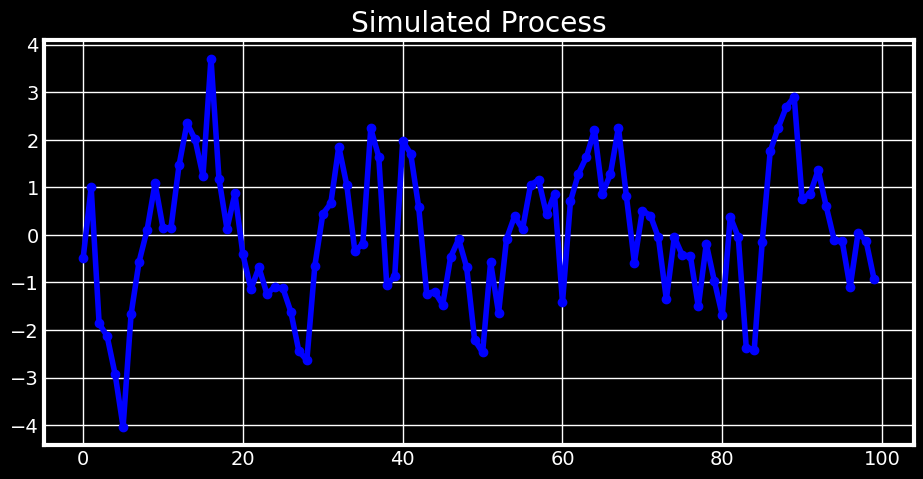

In [102]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

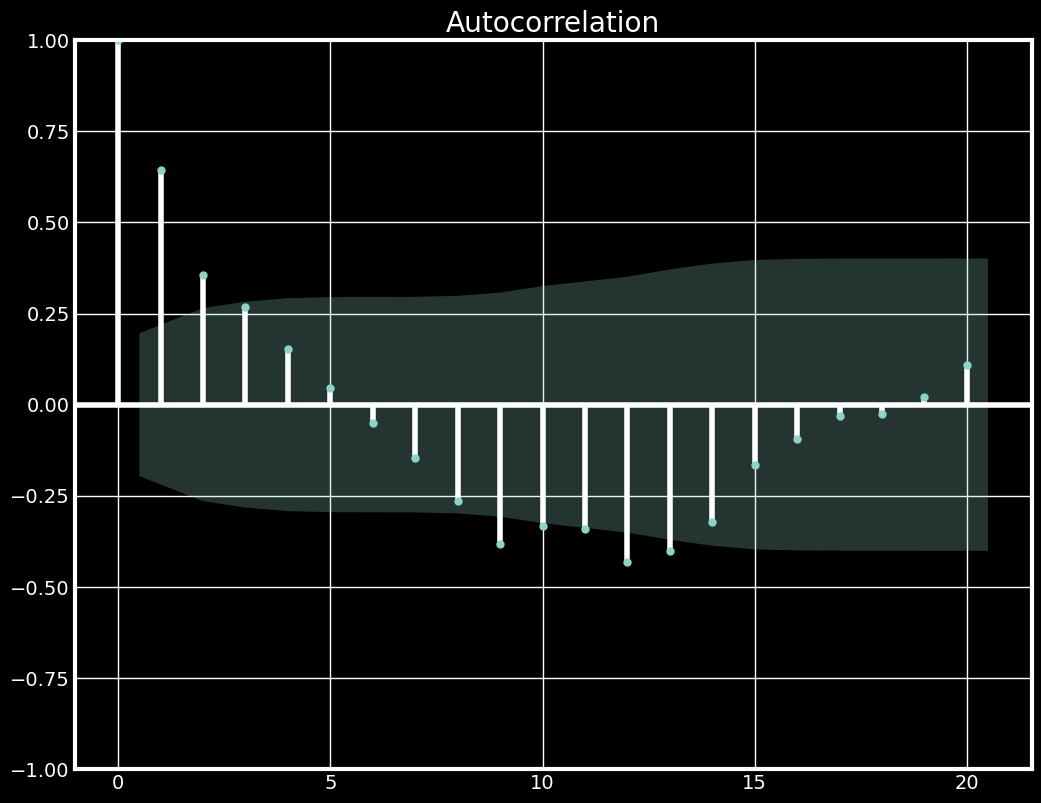

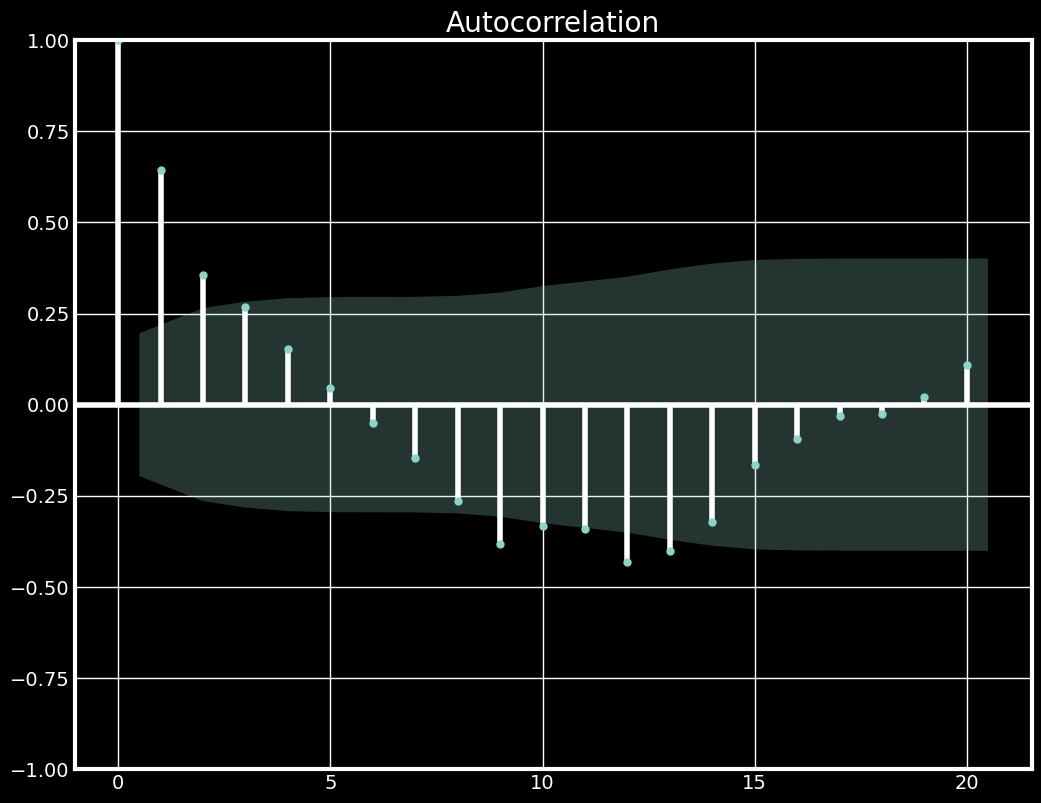

In [103]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

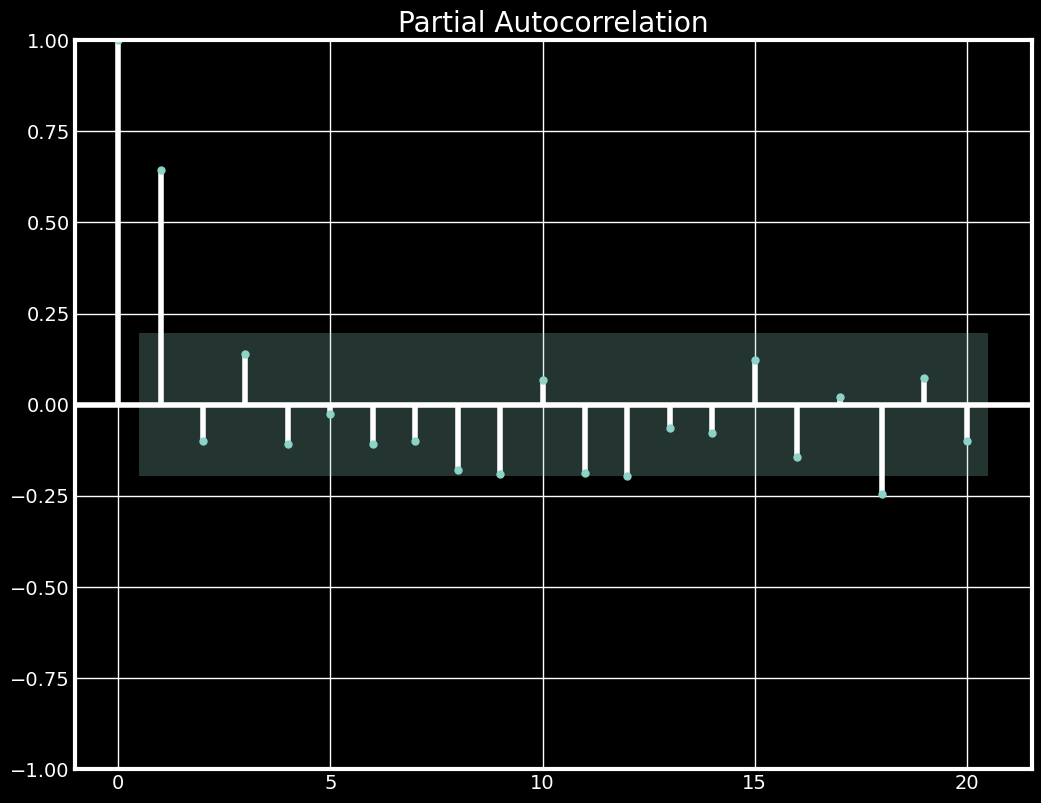

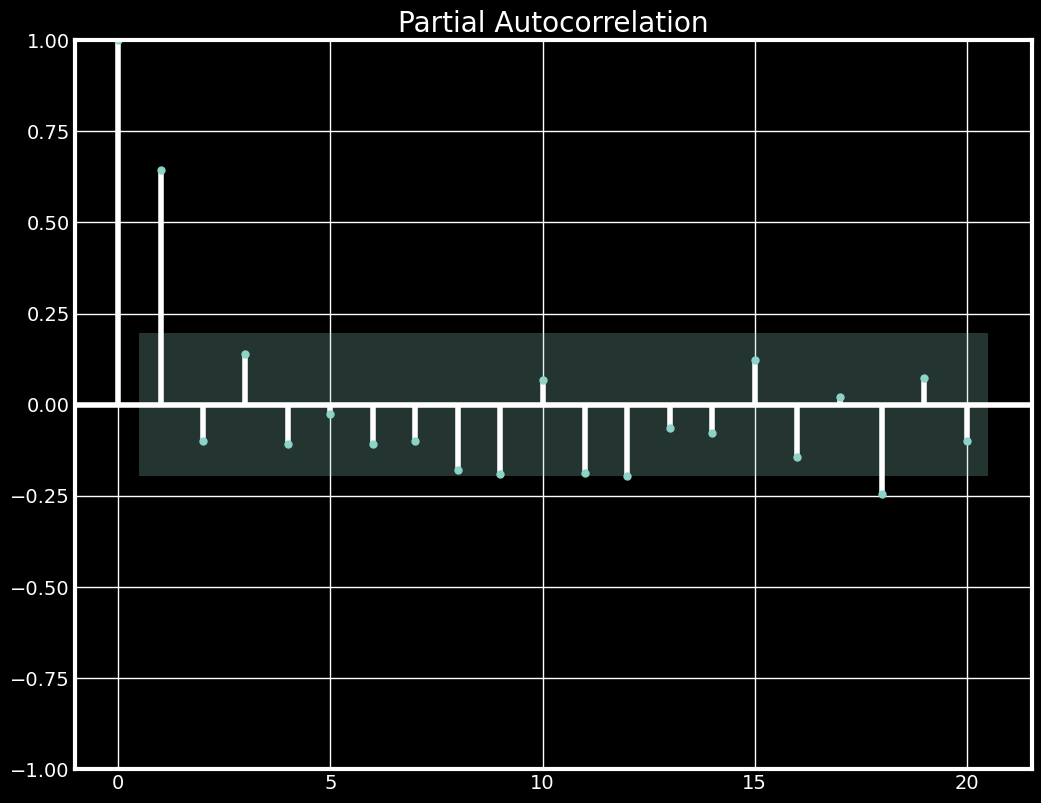

In [104]:
plot_pacf(my_simulation)

In [105]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))
mod_fit = mod.fit()
print(mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -150.682
Date:                Sun, 13 Oct 2024   AIC                            309.364
Time:                        12:03:24   BIC                            319.785
Sample:                             0   HQIC                           313.582
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.275     -0.088      0.930      -0.563       0.515
ar.L1          0.7083      0.111      6.364      0.000       0.490       0.926
ar.L2         -0.1050      0.119     -0.886      0.3

In [106]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.34229008, 0.230067  , 0.48379319, 0.64841943, 0.33504593,
       0.07019402, 0.04481275, 0.91205951, 0.79300965, 0.26988552,
       0.7282637 , 0.43105468, 0.69171651, 0.20759551, 0.9990244 ,
       0.561382  , 0.72542007, 0.587044  , 0.96619485, 0.890996  ])

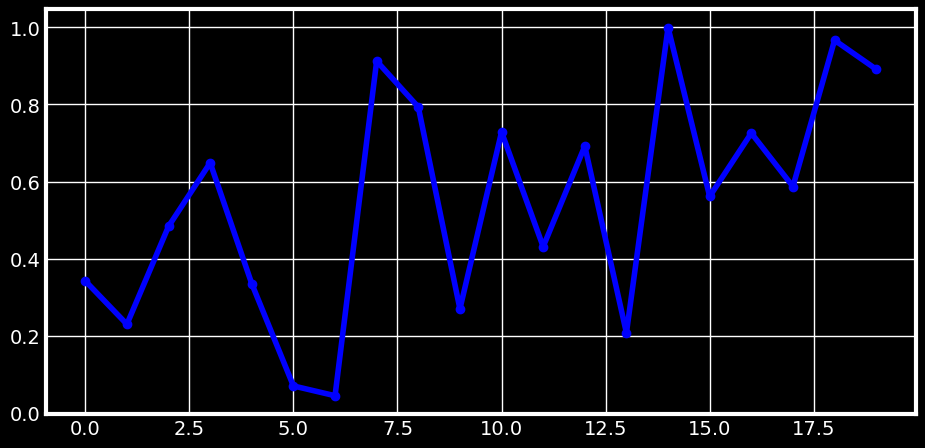

In [107]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [108]:
array.reshape((4,5,1))

array([[[0.34229008],
        [0.230067  ],
        [0.48379319],
        [0.64841943],
        [0.33504593]],

       [[0.07019402],
        [0.04481275],
        [0.91205951],
        [0.79300965],
        [0.26988552]],

       [[0.7282637 ],
        [0.43105468],
        [0.69171651],
        [0.20759551],
        [0.9990244 ]],

       [[0.561382  ],
        [0.72542007],
        [0.587044  ],
        [0.96619485],
        [0.890996  ]]])

In [109]:

array.reshape((2,5,2))

array([[[0.34229008, 0.230067  ],
        [0.48379319, 0.64841943],
        [0.33504593, 0.07019402],
        [0.04481275, 0.91205951],
        [0.79300965, 0.26988552]],

       [[0.7282637 , 0.43105468],
        [0.69171651, 0.20759551],
        [0.9990244 , 0.561382  ],
        [0.72542007, 0.587044  ],
        [0.96619485, 0.890996  ]]])

In [110]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.4939786 , 0.86078518],
        [0.80794381, 0.35054591],
        [0.00681241, 0.8906587 ],
        [0.71991378, 0.01685976],
        [0.31826782, 0.82982368]],

       [[0.4696576 , 0.14895091],
        [0.6140554 , 0.45671887],
        [0.93373141, 0.39442689],
        [0.91622725, 0.68650495],
        [0.988923  , 0.63548723]]])

In [111]:
# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[252, 152, 243],
        [111, 243, 238],
        [134, 118, 101],
        [120, 111, 229],
        [128, 123, 207]],

       [[198, 106, 233],
        [177, 181, 110],
        [103, 248, 151],
        [111, 246, 201],
        [114, 107, 203]],

       [[107, 208, 207],
        [121, 140, 218],
        [129, 108, 148],
        [187, 197, 248],
        [203, 241, 141]],

       [[185, 155, 101],
        [159, 244, 223],
        [156, 242, 158],
        [252, 253, 205],
        [115, 250, 199]]], dtype=uint8)

In [112]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

# **Importing Data**

Getting the Amazon stock data from yahoo financial API

In [113]:
!pip install yahoofinancials
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials # after installing the module, you can import it.

AMZN = yf.download('AMZN',
                      start='2013-01-01',
                      end='2022-08-09',
                      progress=False)
# AMZN = yf.download('AMZN') for all
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

In [114]:
!pip install yahoofinancials


In [115]:
all_data.to_csv('stock_data.csv')

In [116]:
all_data.head(10)

Adj Close   Open   High    Low  Close    Volume
Date                                                       
2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000
2013-01-08      13.32  13.35  13.45  13.18  13.32  60214000
2013-01-09      13.32  13.41  13.48  13.27  13.32  45312000
2013-01-10      13.27  13.43  13.44  13.11  13.27  57268000
2013-01-11      13.40  13.26  13.42  13.21  13.40  48266000
2013-01-14      13.64  13.40  13.71  13.38  13.64  85500000
2013-01-15      13.60  13.53  13.64  13.47  13.60  46538000

In [117]:
all_data.tail()

Adj Close    Open    High     Low   Close    Volume
Date                                                           
2022-08-02     134.16  134.72  137.44  134.09  134.16  61922400
2022-08-03     139.52  136.21  140.49  136.05  139.52  71827800
2022-08-04     142.57  140.58  143.56  139.55  142.57  70585000
2022-08-05     140.80  140.10  142.86  139.60  140.80  50686900
2022-08-08     139.41  142.05  144.23  138.29  139.41  52229000

# **EXploratory Data Analysis (EDA)**

In [118]:
all_data.shape

(2417, 6)

In [119]:
all_data.columns

Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [120]:
all_data.duplicated()

Date
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
2013-01-08    False
              ...  
2022-08-02    False
2022-08-03    False
2022-08-04    False
2022-08-05    False
2022-08-08    False
Length: 2417, dtype: bool

In [121]:
all_data.duplicated().sum()

0

In [122]:
#Getting all the columns
print("Features of the dataset:")
all_data.columns

Features of the dataset:


Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [123]:
#check details about the data set
print('Here is the information regarding the dataset :')
all_data.info()

Here is the information regarding the dataset :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2417 entries, 2013-01-02 to 2022-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2417 non-null   float64
 1   Open       2417 non-null   float64
 2   High       2417 non-null   float64
 3   Low        2417 non-null   float64
 4   Close      2417 non-null   float64
 5   Volume     2417 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


In [124]:
#print the unique value
print('Here is the unique values in our dataset')
all_data.nunique()

Here is the unique values in our dataset


Adj Close    2041
Open         1999
High         2037
Low          2069
Close        2041
Volume       2370
dtype: int64

In [125]:
#printign the data types of our data
print('Here is the data types of the dataset :')
all_data.dtypes

Here is the data types of the dataset :


Adj Close    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
dtype: object

In [126]:
#Looking for the description of the dataset to get insights of the data
all_data.describe(include='all').T

count          mean           std          min          25%  \
Adj Close  2417.0  7.225407e+01  5.372190e+01        12.41        21.49   
Open       2417.0  7.228448e+01  5.377292e+01        12.45        21.49   
High       2417.0  7.308940e+01  5.442133e+01        12.65        21.65   
Low        2417.0  7.139028e+01  5.305112e+01        12.29        21.31   
Close      2417.0  7.225407e+01  5.372190e+01        12.41        21.49   
Volume     2417.0  8.069699e+07  4.264758e+07  17626000.00  53768000.00   

                   50%          75%           max  
Adj Close        51.28       100.65  1.865700e+02  
Open             51.06       101.28  1.872000e+02  
High             51.58       102.02  1.886500e+02  
Low              50.55       100.18  1.848400e+02  
Close            51.28       100.65  1.865700e+02  
Volume     69110000.00  93544000.00  4.771220e+08

In [127]:
#check for count of missing values in each column.
print('Here are the details of missing value details in our dataet:')
all_data.isna().sum()
all_data.isnull().sum()

Here are the details of missing value details in our dataet:


Adj Close    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

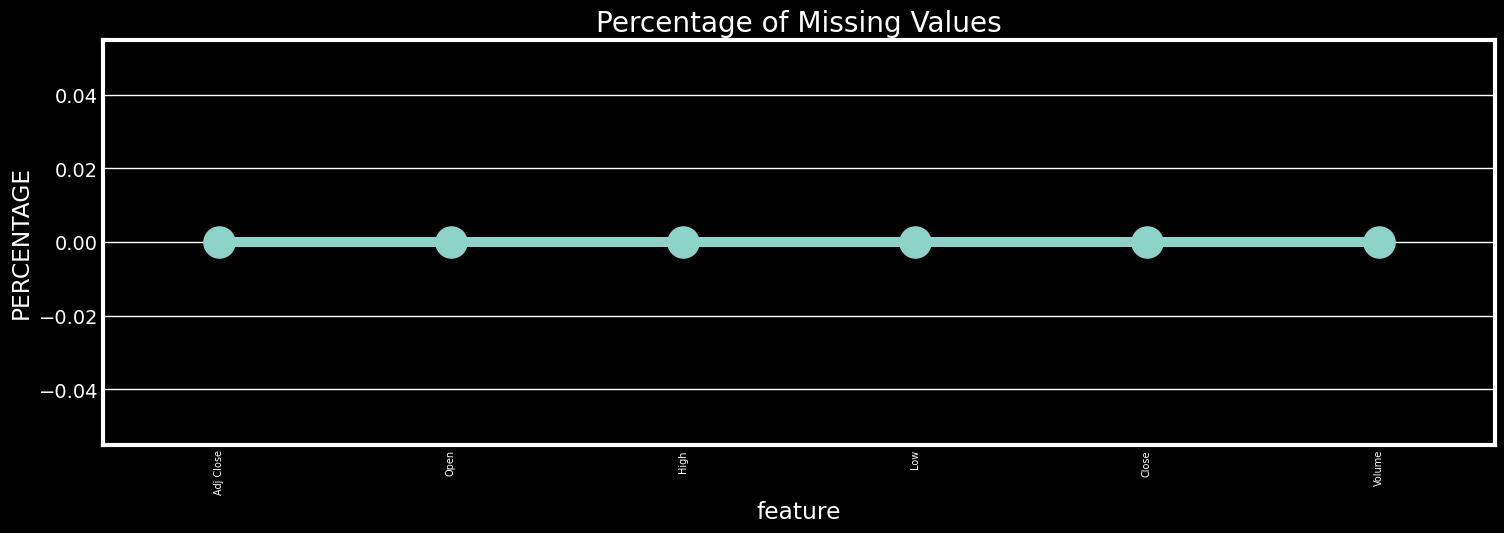

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'all_data' is your dataset
missing = pd.DataFrame((all_data.isnull().sum())*100/all_data.shape[0]).reset_index()

# Rename the columns for easier plotting
missing.columns = ['feature', 'percentage']

# Plot
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='feature', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


<Axes: xlabel='Date'>

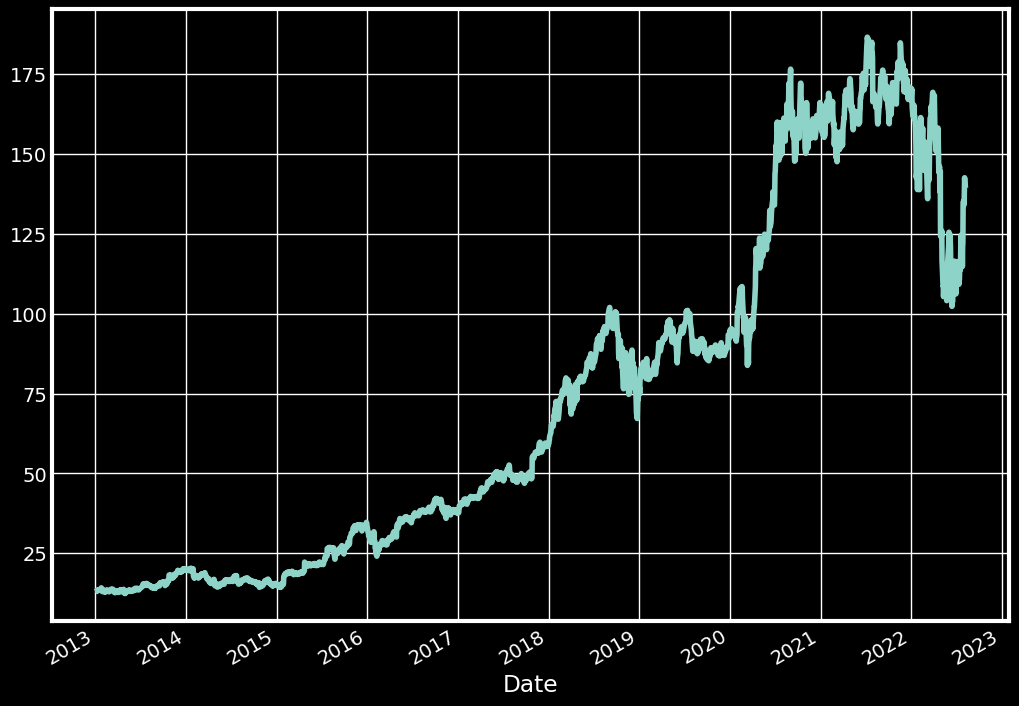

In [129]:
all_data['Close'].plot()

<Axes: xlabel='Date'>

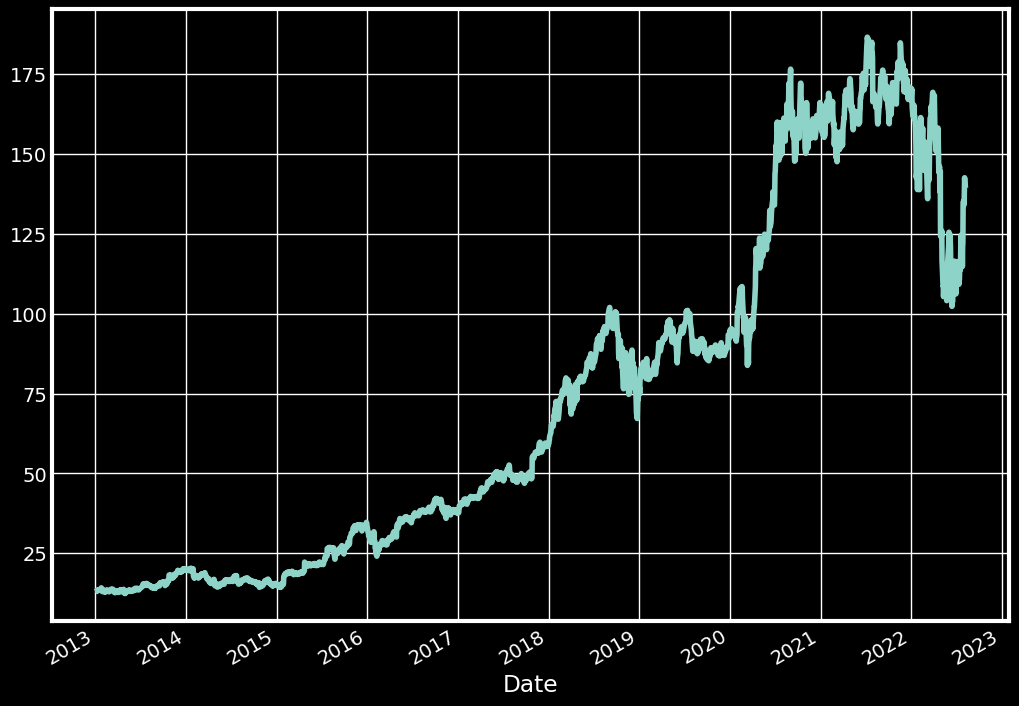

In [130]:
new_var = all_data['Adj Close'].plot()
new_var

<Axes: xlabel='Date'>

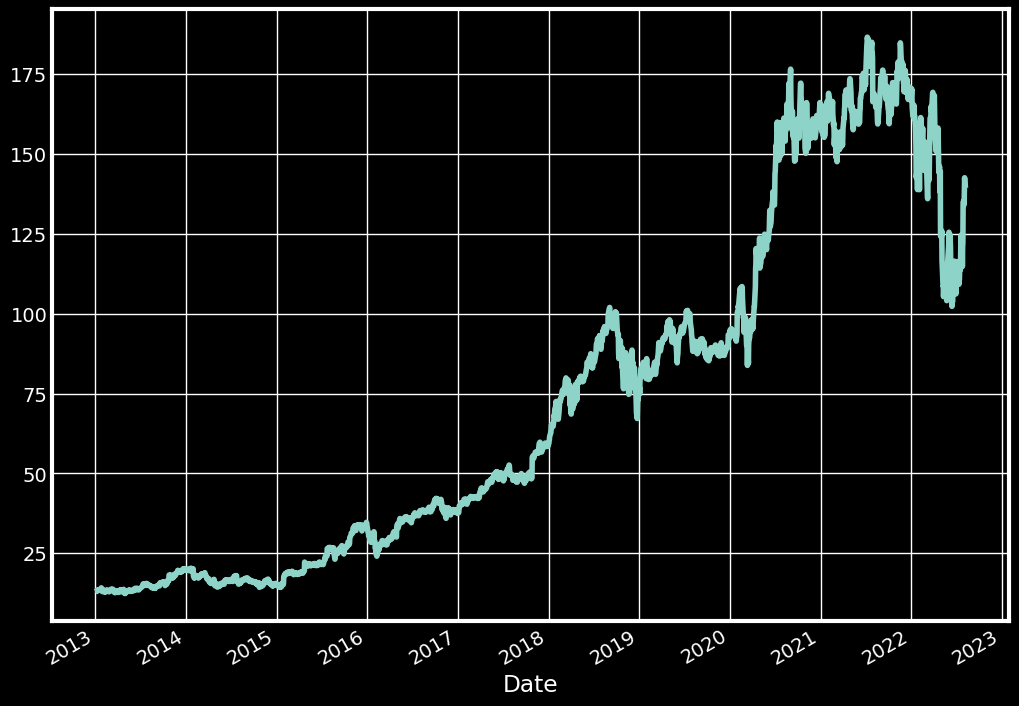

In [131]:
all_data['Adj Close'].plot()

<Axes: xlabel='Open', ylabel='count'>

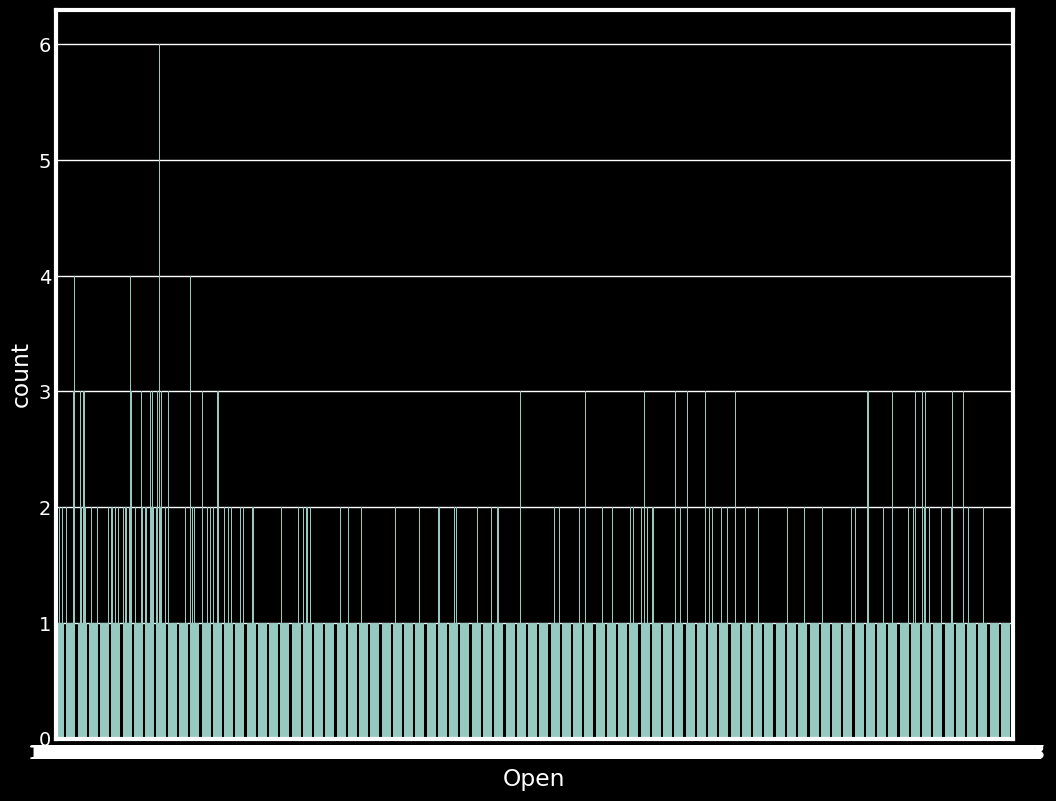

In [132]:
sns.countplot(x=all_data.Open)

In [133]:
data = pd.read_csv('stock_data.csv')

In [134]:
data.head()

Date  Adj Close   Open   High    Low  Close    Volume
0  2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
1  2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
2  2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
3  2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000
4  2013-01-08      13.32  13.35  13.45  13.18  13.32  60214000

#### **Seasonality Plot for each column in our data**

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose

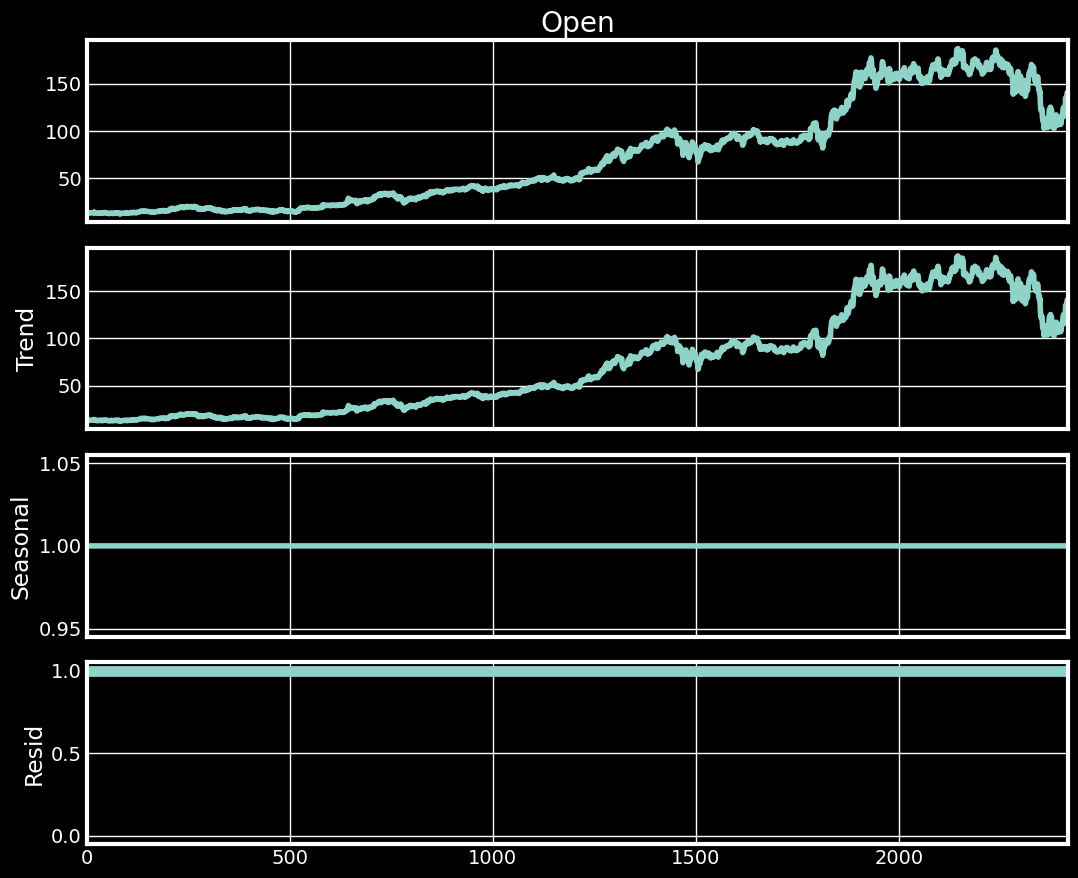

In [136]:
decompose_result = seasonal_decompose(data.Open, model='multiplicative', period=1)
decompose_result.plot();

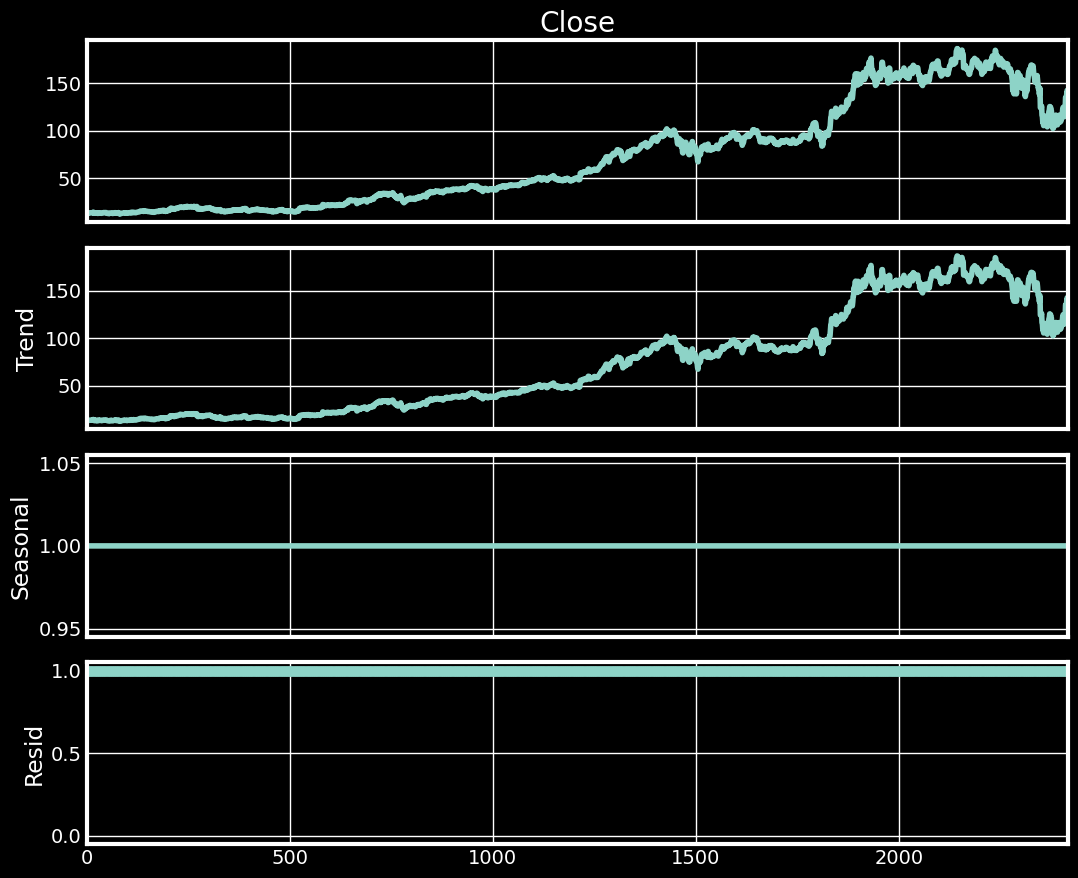

In [137]:
decompose_result = seasonal_decompose(data.Close, model='multiplicative', period=1)
decompose_result.plot();

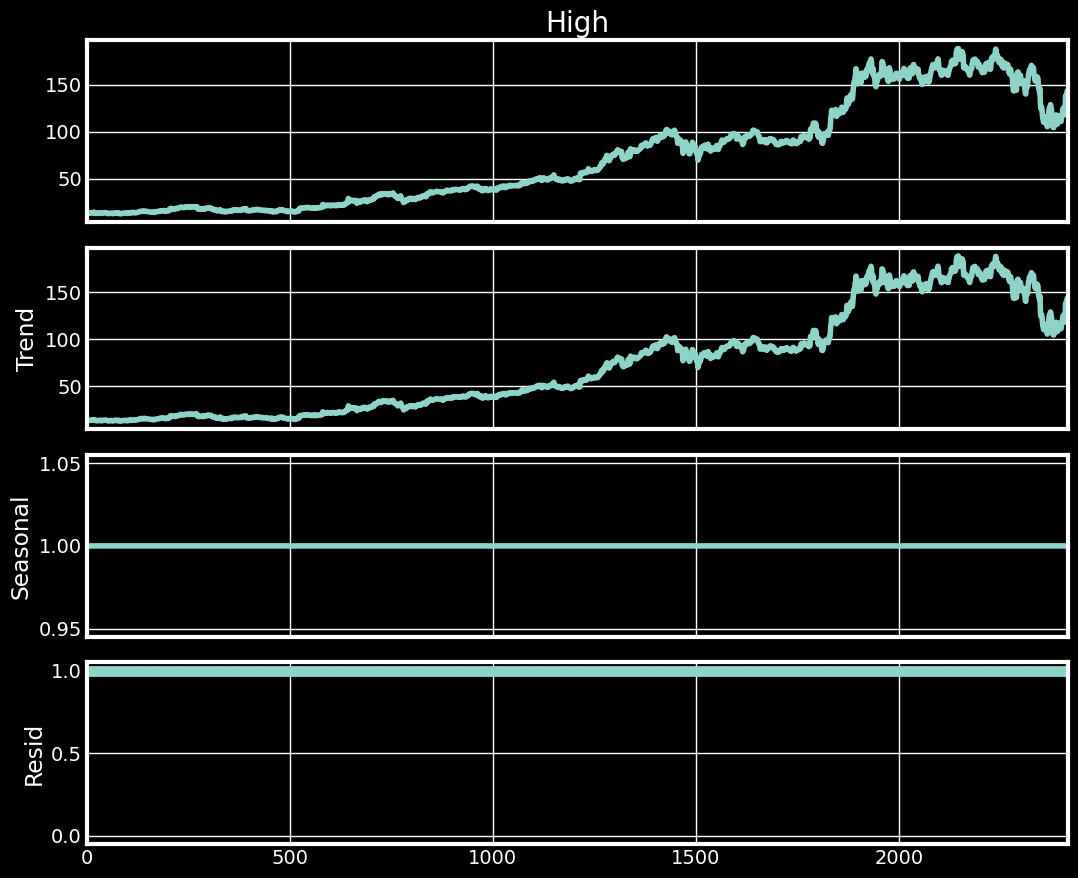

In [138]:
decompose_result = seasonal_decompose(data.High, model='multiplicative', period=1)
decompose_result.plot();

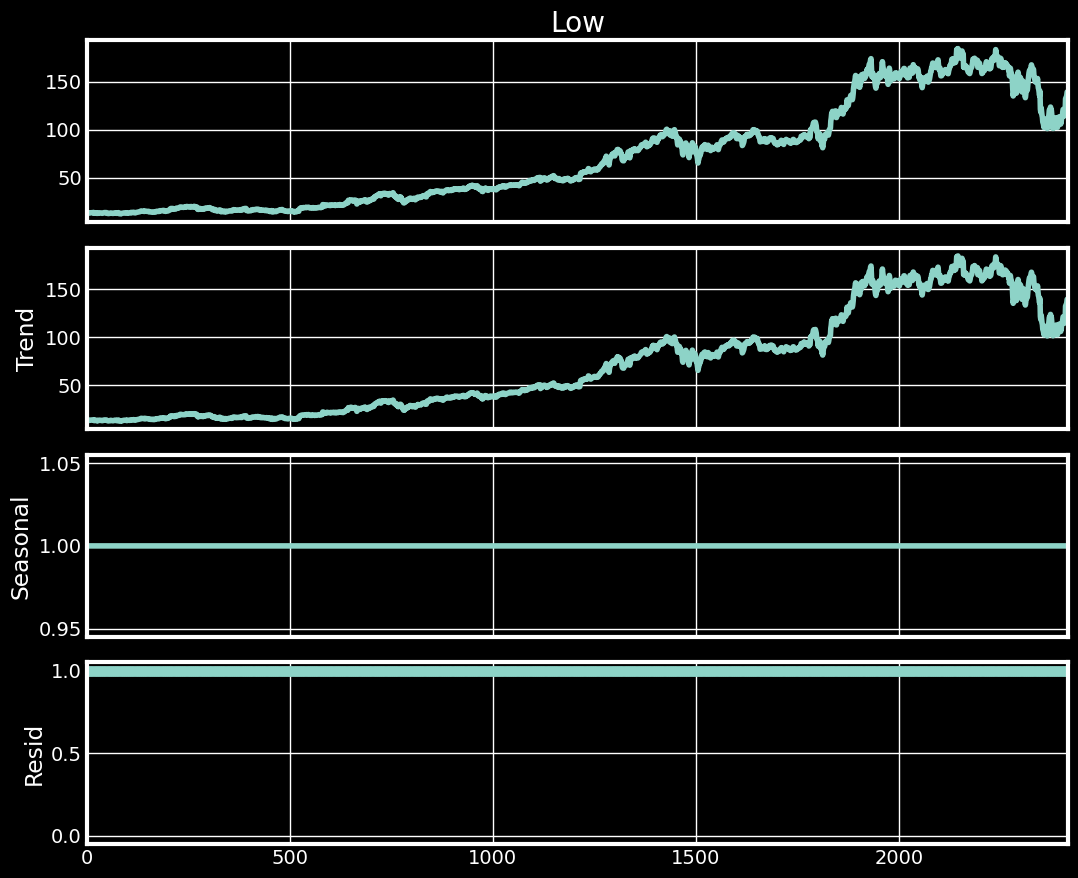

In [139]:
decompose_result = seasonal_decompose(data.Low, model='multiplicative', period=1)
decompose_result.plot();

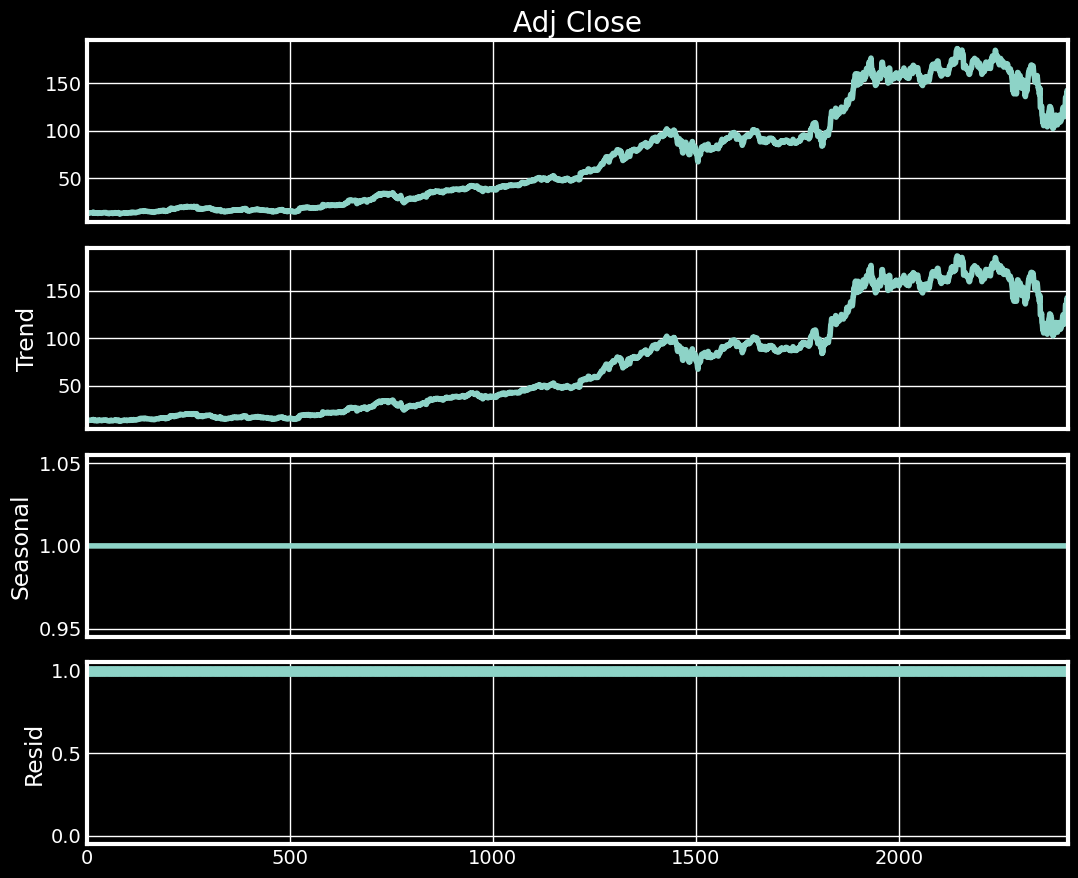

In [140]:
decompose_result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=1)
decompose_result.plot();

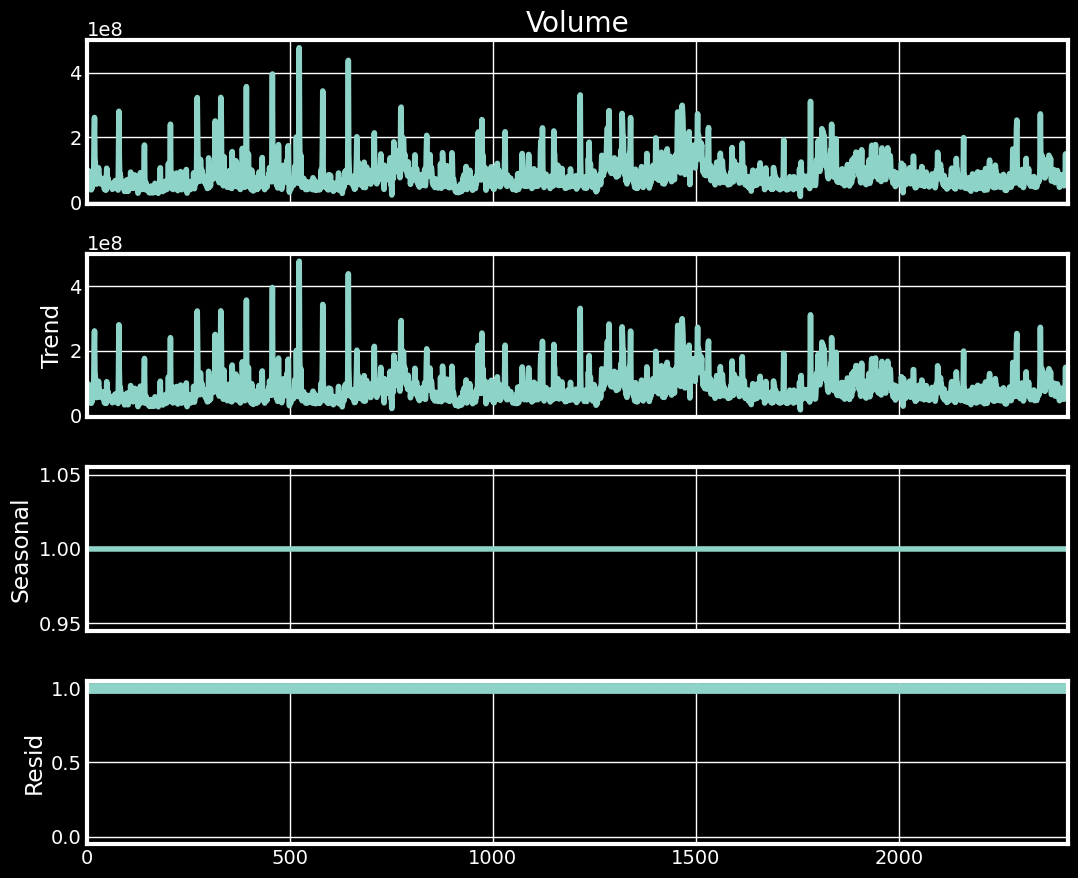

In [141]:
decompose_result = seasonal_decompose(data['Volume'], model='multiplicative', period=1)
decompose_result.plot();

**As We can see from the above there is no seasonality in our data.**

### **Distribution Plot**

<ipython-input-142-6ce5956e60b6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




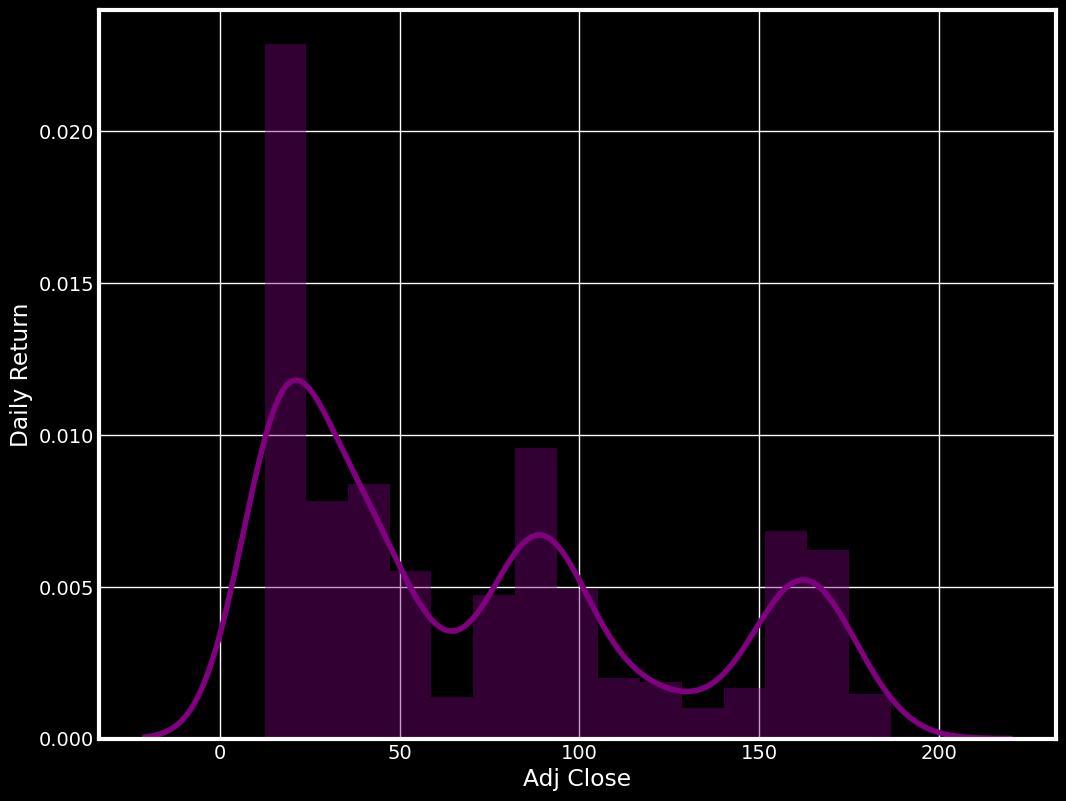

In [142]:
sns.distplot(data['Adj Close'].dropna(), color='purple');
plt.ylabel('Daily Return');

<ipython-input-143-a9fde1a80a1b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

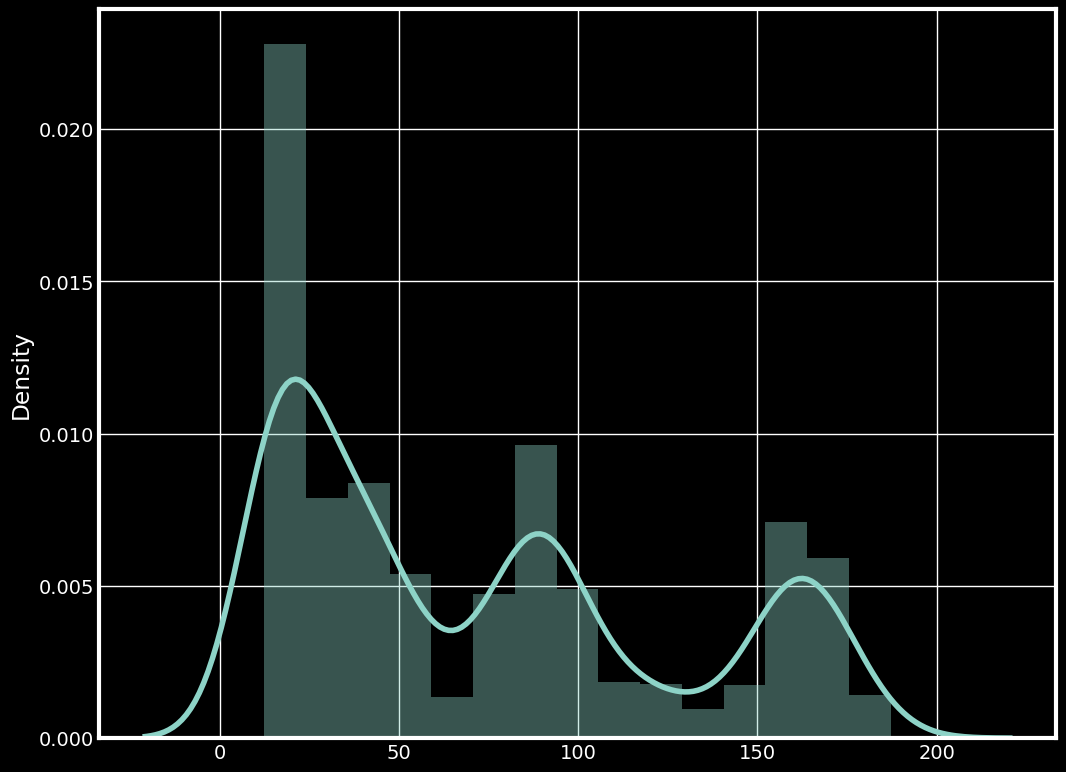

In [143]:
sns.distplot(x=all_data.Open)

<ipython-input-144-7f0393e5b26d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

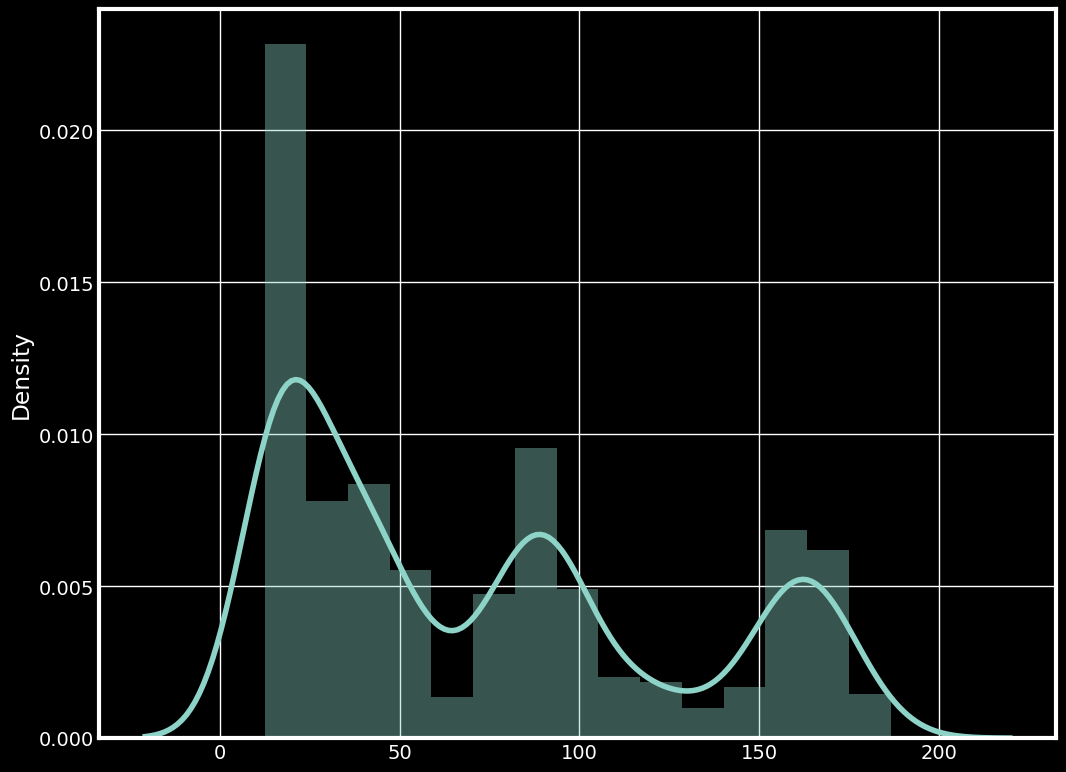

In [144]:
sns.distplot(x=all_data.Close)

<ipython-input-145-0e4e5f87f3fb>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

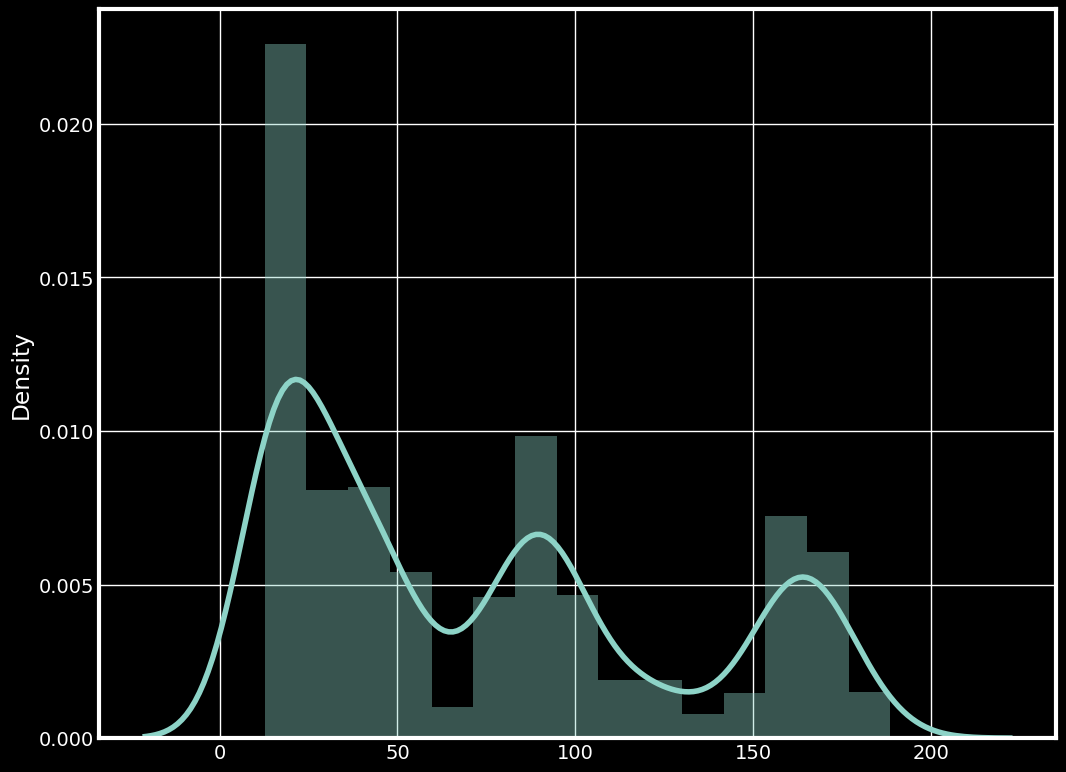

In [145]:
sns.distplot(x=all_data.High)

<ipython-input-146-7f0393e5b26d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

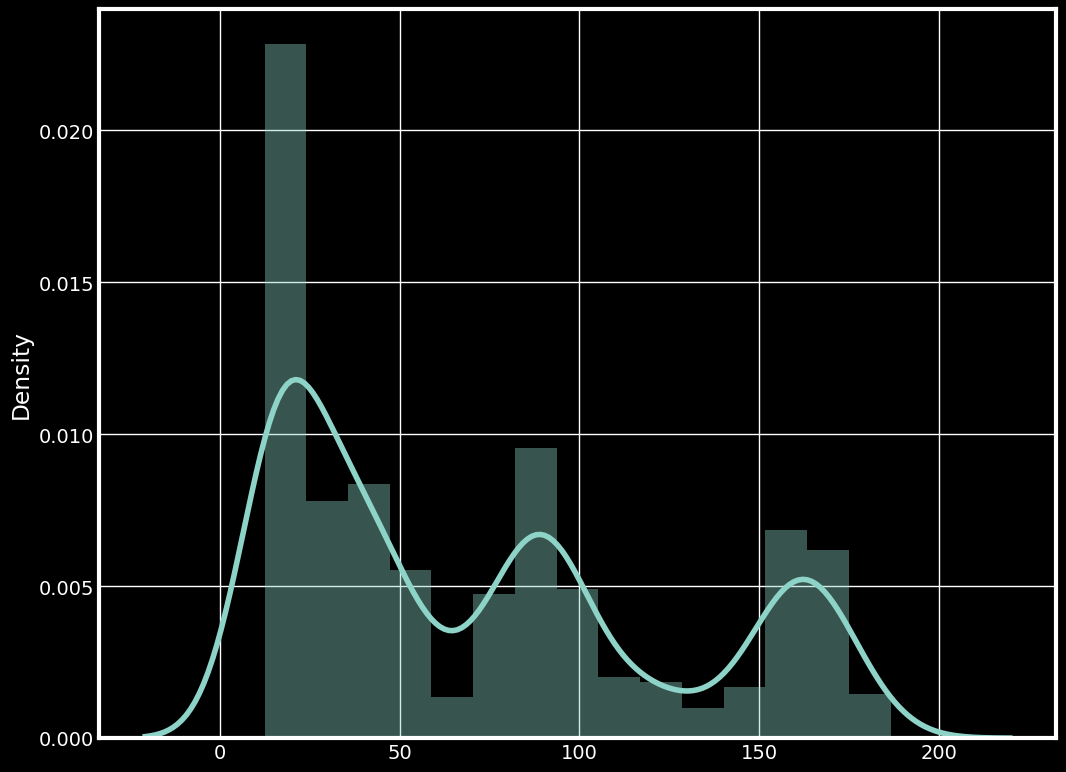

In [146]:
sns.distplot(x=all_data.Close)

In [147]:
data.columns, data.head()

(Index(['Date', 'Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object'),
          Date  Adj Close   Open   High    Low  Close    Volume
 0  2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
 1  2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
 2  2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
 3  2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000
 4  2013-01-08      13.32  13.35  13.45  13.18  13.32  60214000)

### **Line Plots**

In [148]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

In [149]:
fig = px.line(data,x = 'Date', y = ['High', 'Low'], template = 'plotly_dark')
fig.show()

In [150]:
fig = px.line(data,x = 'Date', y = ['Open', 'Close'], template = 'plotly_dark')
fig.show()

In [151]:
fig = px.line(data,x = 'Date', y = ['Adj Close'], template = 'plotly_dark')
fig.show()

**From above plots we can conclude that:**

**1. High - Increases over time**

**2. Low - Increases over time**

**3. Open - Increases over time**

**4. Close - Increases over time**

In [152]:
fig = px.line(data,x = 'Date', y = ['Volume'], template = 'plotly_dark')
fig.show()

**From above plot we can conclude that : Volume doesn't increase gradually but have non-linear decrement**

### **Candle Stick Plot**

In [153]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'] ,increasing_line_color= 'cyan', decreasing_line_color= 'gray')])

fig.show()

**From above plot we can conclude that:Amazon's Stock increases over time and then have sudden shift in its increment**

### **Joint Plot**

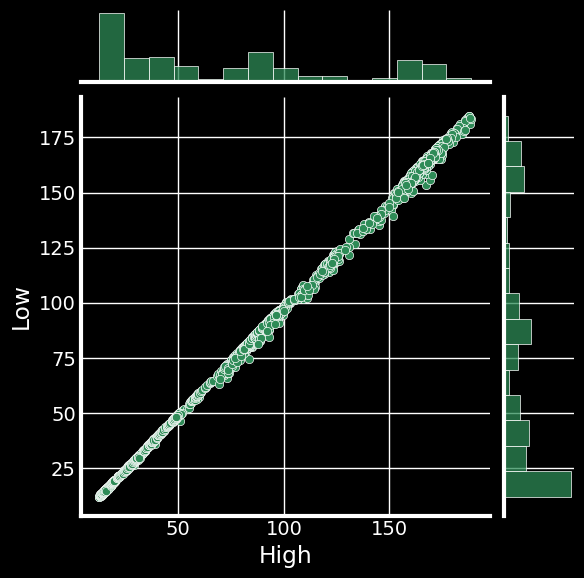

In [154]:
sns.jointplot(x='High', y='Low', data=data, kind='scatter', color='seagreen')


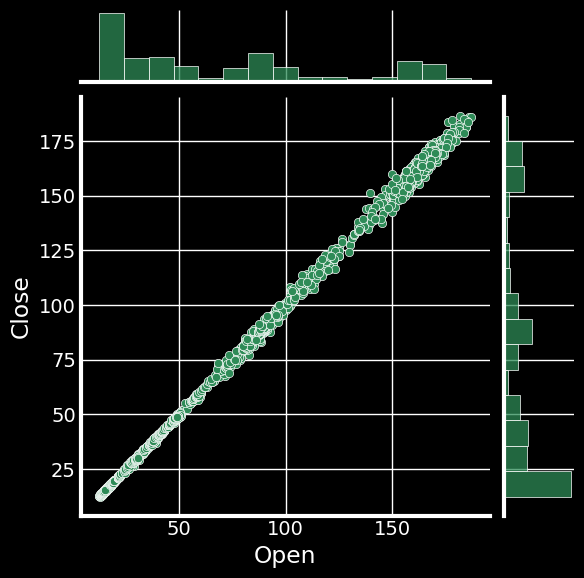

In [155]:
sns.jointplot(x='Open', y='Close', data=data, kind='scatter', color='seagreen')


**From above plot we can conclude that:**


**1. High and low are linarly dependent**


**2. Open and close are linearly dependent**

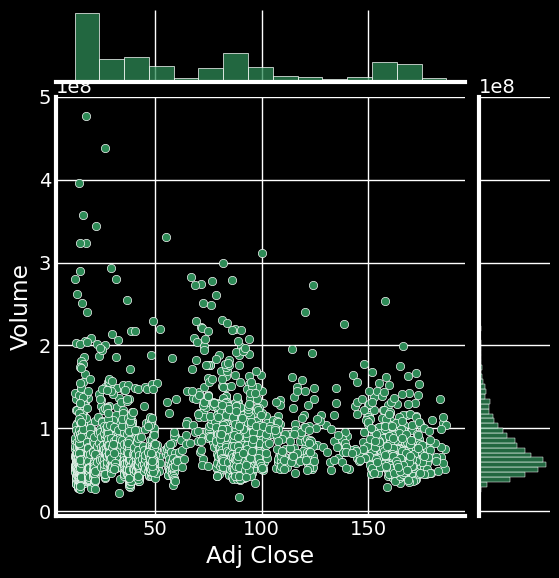

In [156]:
sns.jointplot(x='Adj Close', y='Volume', data=data, kind='scatter', color='seagreen')


### **Pairplot**

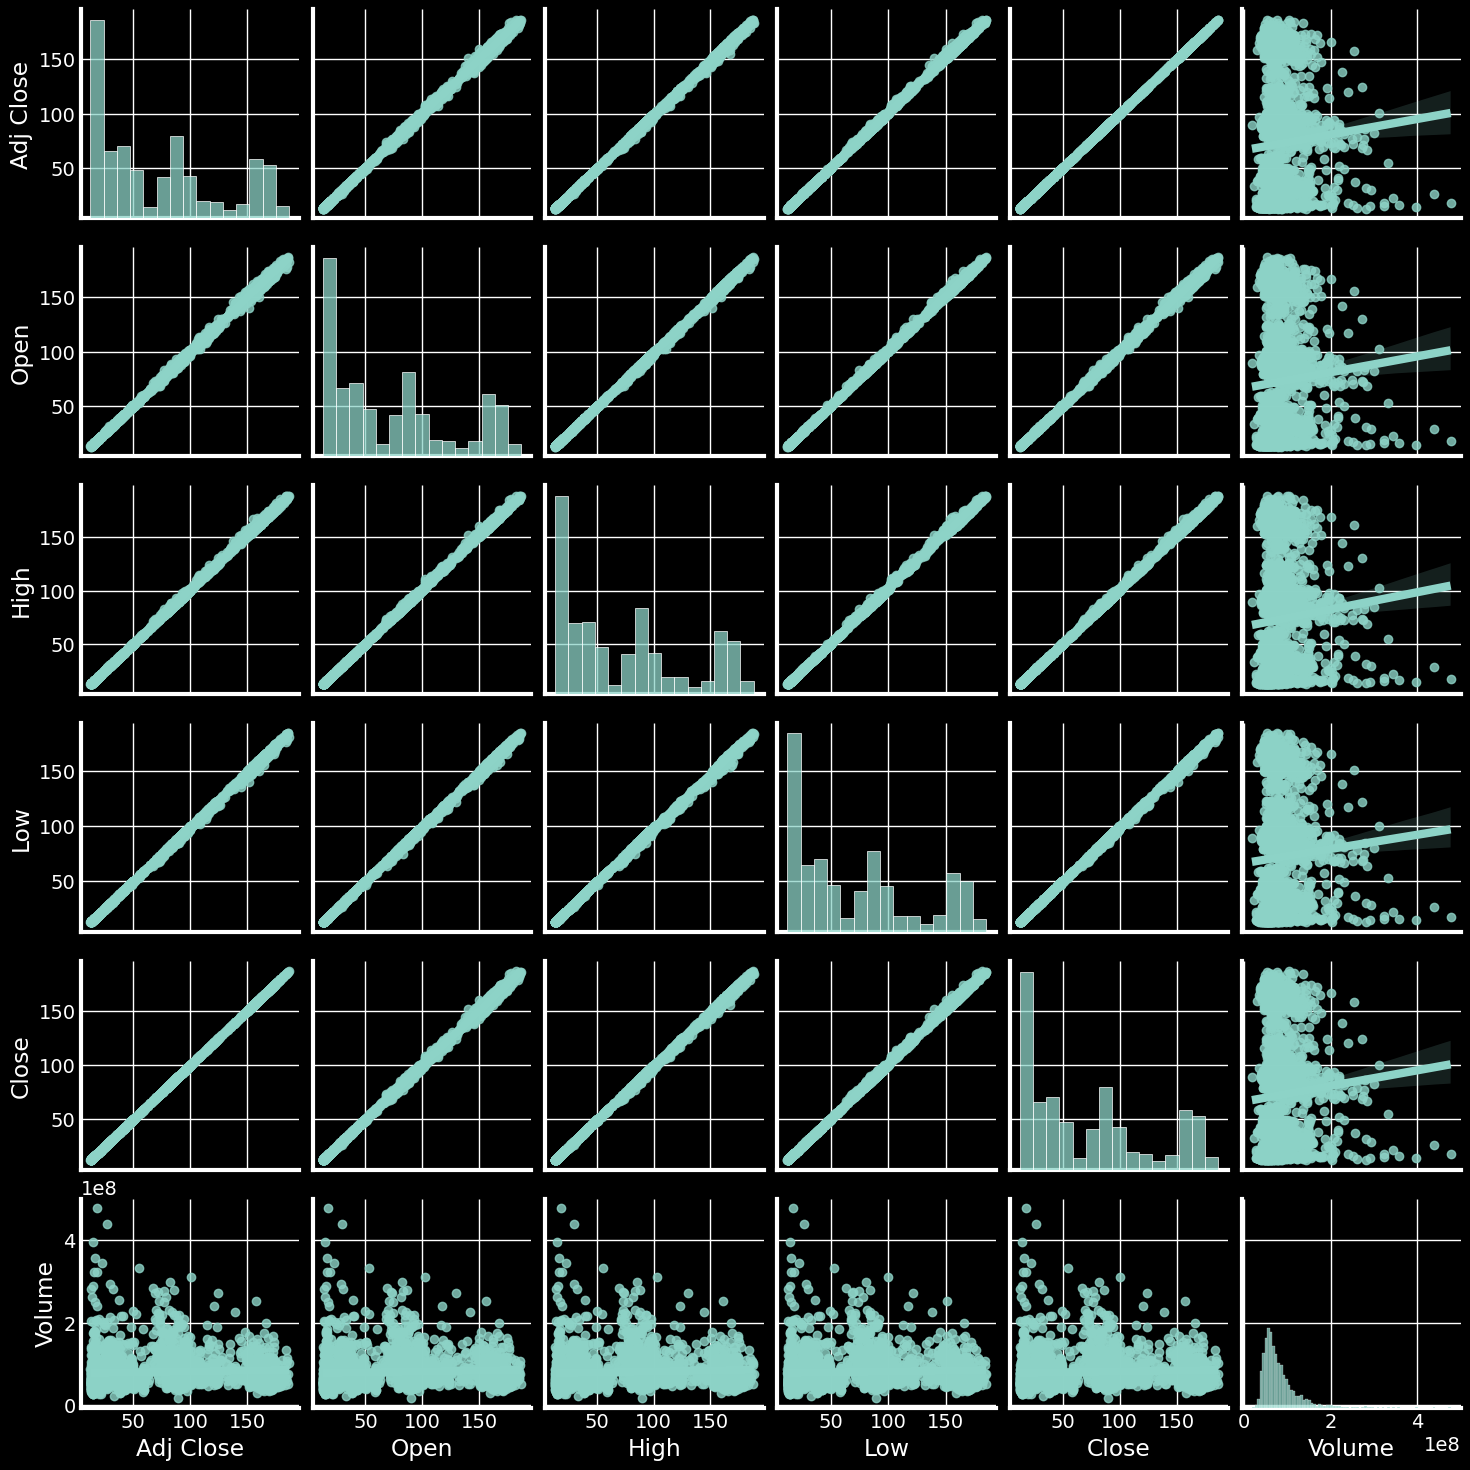

In [157]:
sns.pairplot(data.drop('Date', axis =1), kind='reg');

### **Correlation Plot**

In [158]:
import numpy as np
import plotly.express as px

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix and plot it
fig = px.imshow(numeric_data.corr(), template='plotly_dark')
fig.show()


### **3D - Scatter Plot**

In [159]:
fig = px.scatter_3d(data, x='High', y='Low', z='Close',
              color='Adj Close', template = 'plotly_dark', title = 'Distribution of Highs, Lows and Closing Values represented by Adj Close')
fig.show()

In [160]:
print('Ternary Scatter Plot')
fig = px.scatter_ternary(data, a="High", b="Low", c="Close",hover_name="Volume",
    color="Adj Close", template = 'plotly_dark', size_max=30,)
fig.show()

Ternary Scatter Plot


<ipython-input-161-5c8c3c7c7b87>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<BarContainer object of 32 artists>

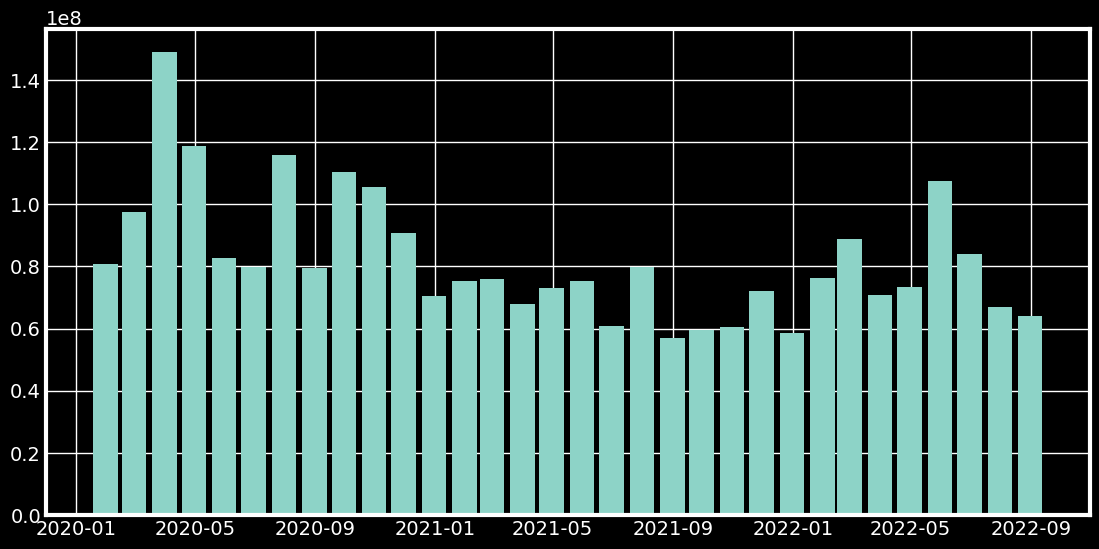

In [161]:
from matplotlib import dates
df_month = all_data.resample("M").mean()
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
ax.bar(df_month['2020':].index, df_month.loc['2020':, "Volume"], width=25, align='center')

### **Resampling and Rolling**

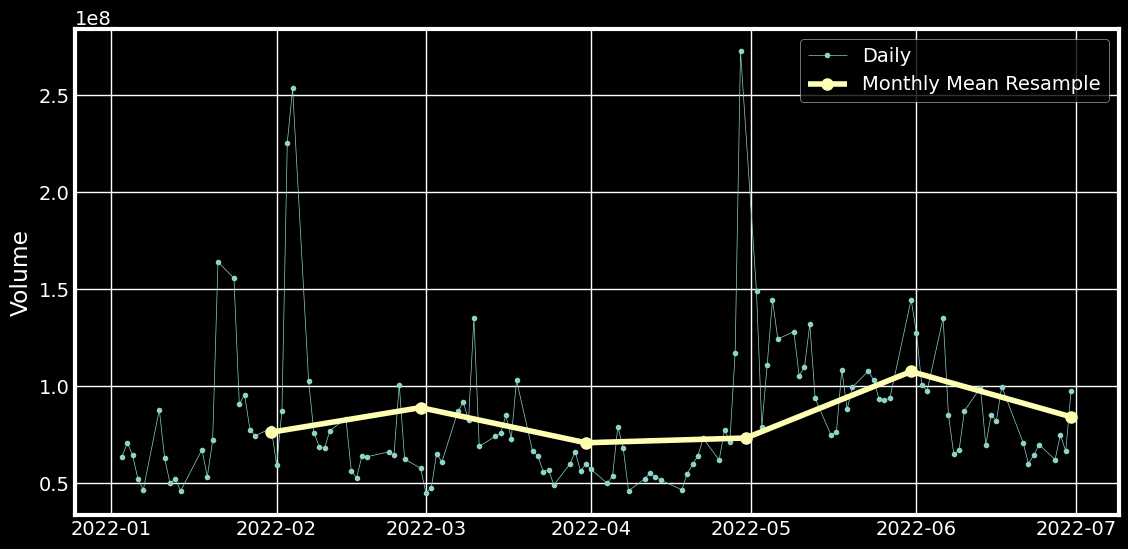

In [162]:
start, end = '2022-01', '2022-06'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_month.loc[start:end, 'Volume'],
marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Volume')
ax.legend();

#### **Week Resample**

In [163]:
df_week = all_data.resample("W").mean()

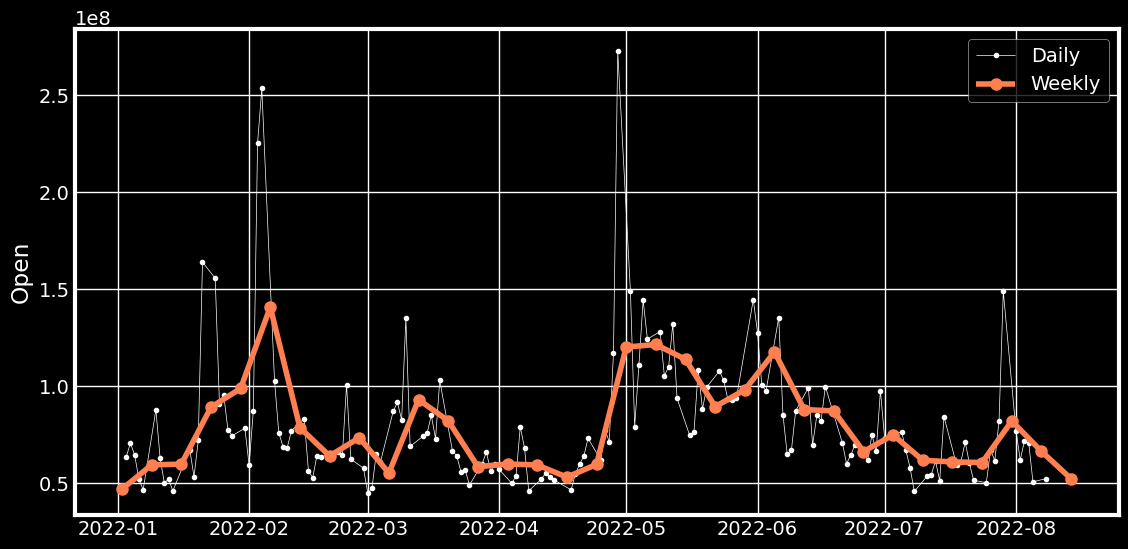

In [164]:
start, end = '2022-01', '2022-08'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='white')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()

#### **Rolling**

Rolling takes the average of a specified amount of data.

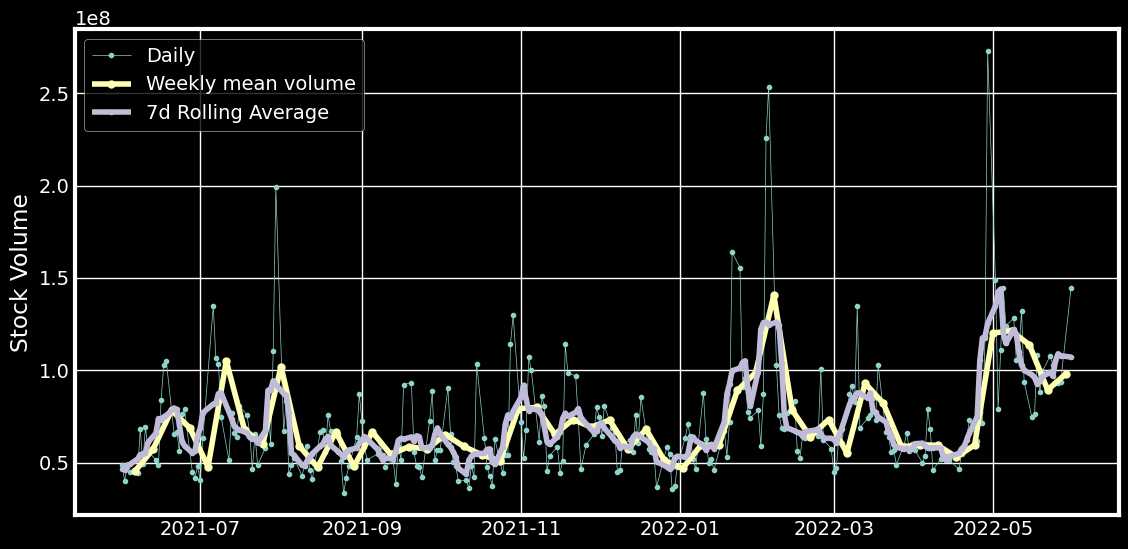

In [165]:
df_7d_rolling = all_data.rolling(7, center=True).mean()
start, end = '2021-06', '2022-05'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'], marker='.', linestyle='-',
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5,
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

### **Differencing**

Differencing takes the difference in values of a specified distance.It is a popular method to remove the trend in the data. The trend is not good for forecasting or modeling.

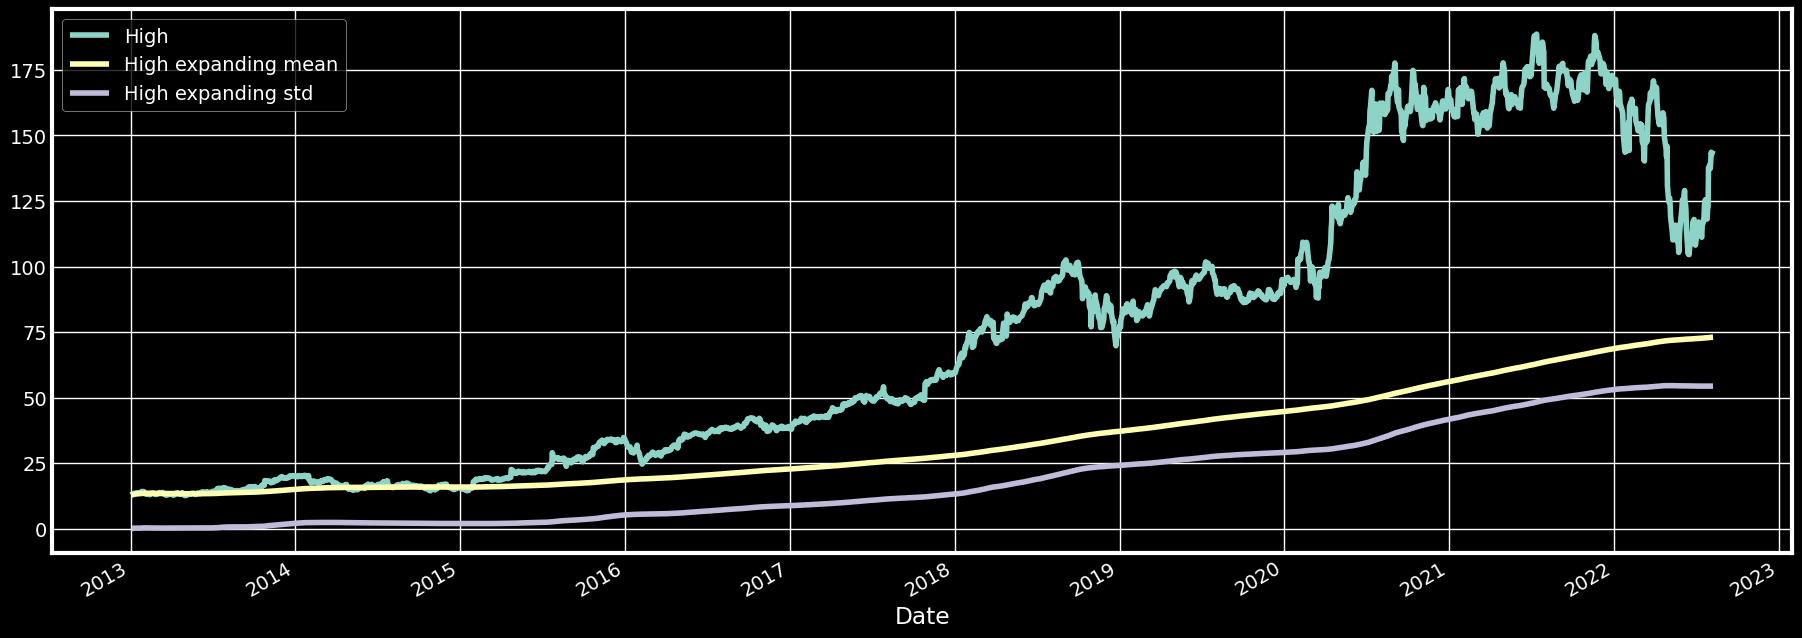

In [166]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = all_data.High.plot(label='High')
ax = all_data.High.expanding().mean().plot(label='High expanding mean')
ax = all_data.High.expanding().std().plot(label='High expanding std')
ax.legend()

### **Decomposition**

**Decomposition will show the observations and these three elements in the same plot:**

**1. Trend: Consistent upward or downward slope of a time series.**

**2. Seasonality: Clear periodic pattern of a time series**

**3. Noise: Outliers or missing values**

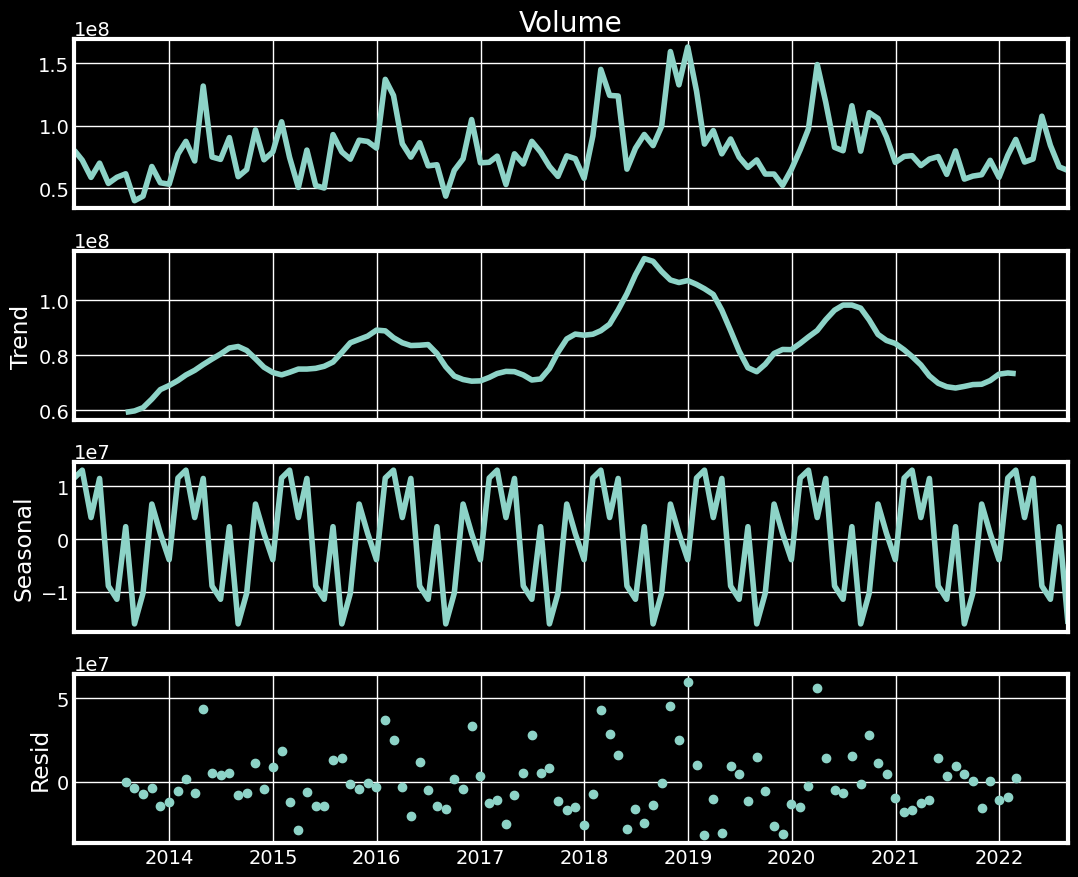

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
fig = decomposition.plot()
plt.show()

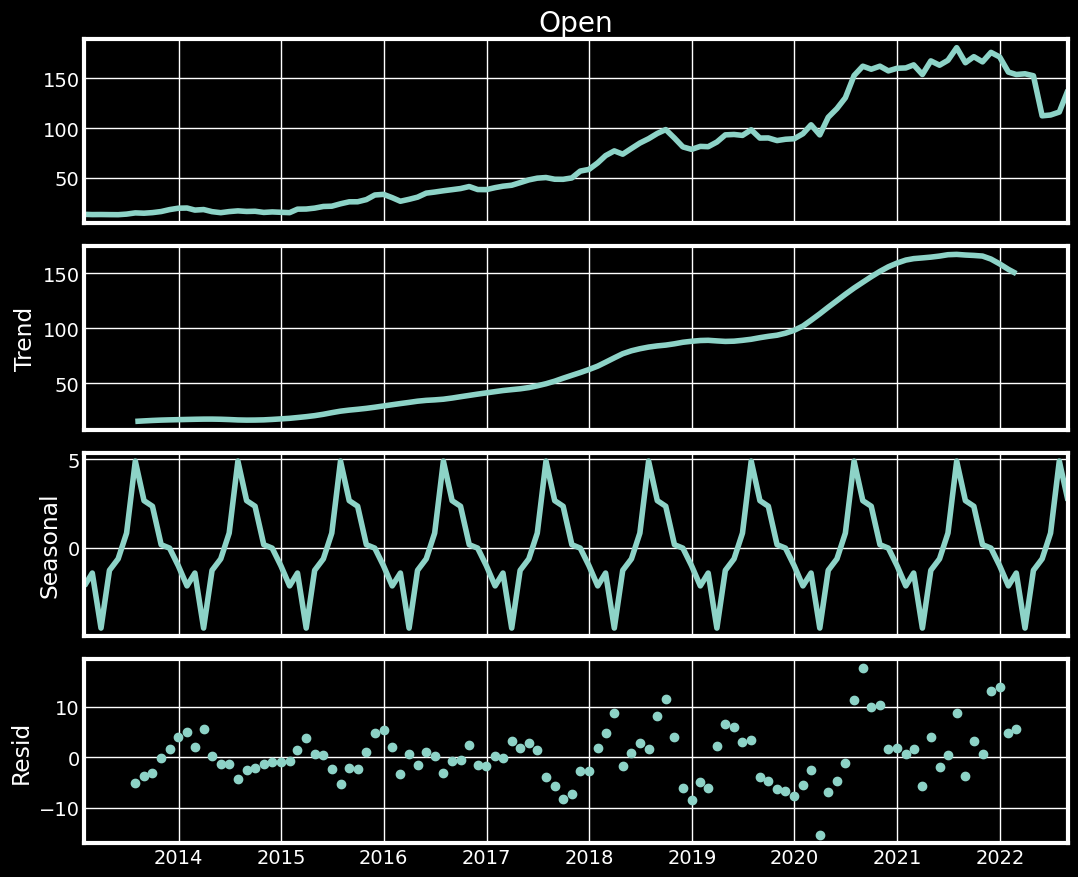

In [168]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Open'], model='Additive')
fig = decomposition.plot()
plt.show()

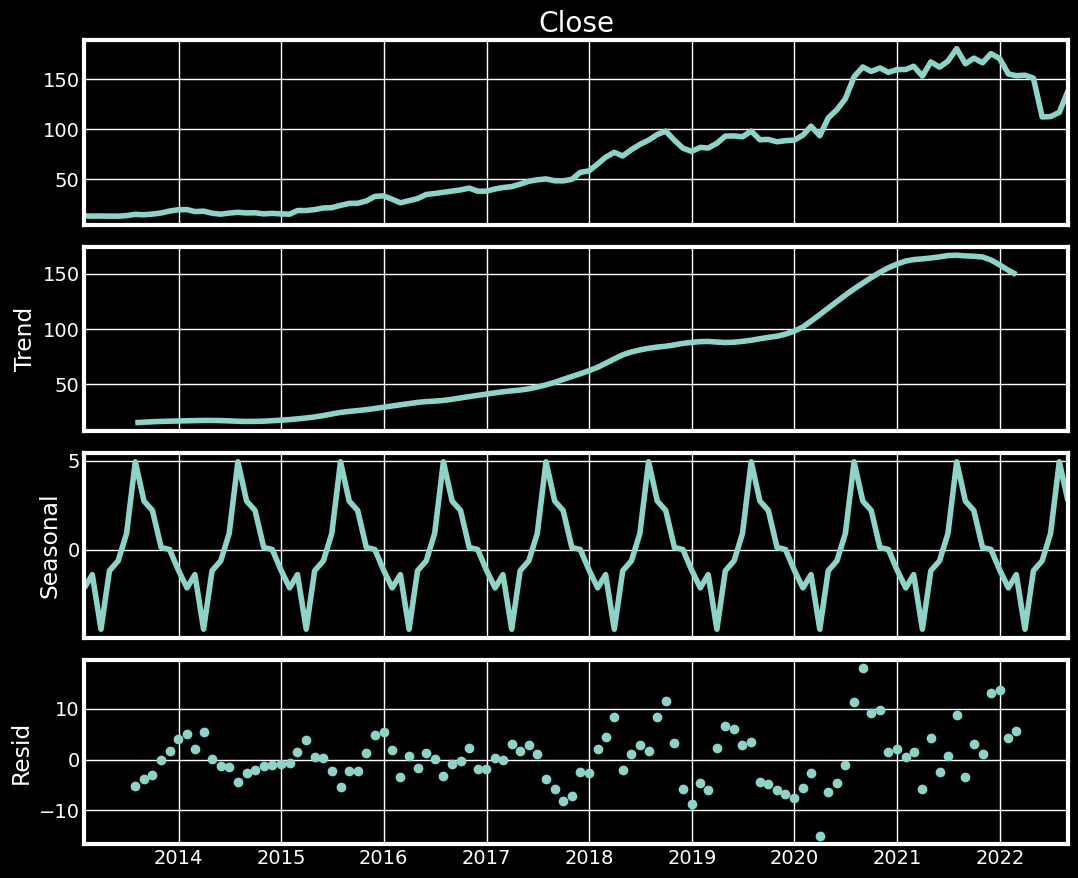

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Close'], model='Additive')
fig = decomposition.plot()
plt.show()

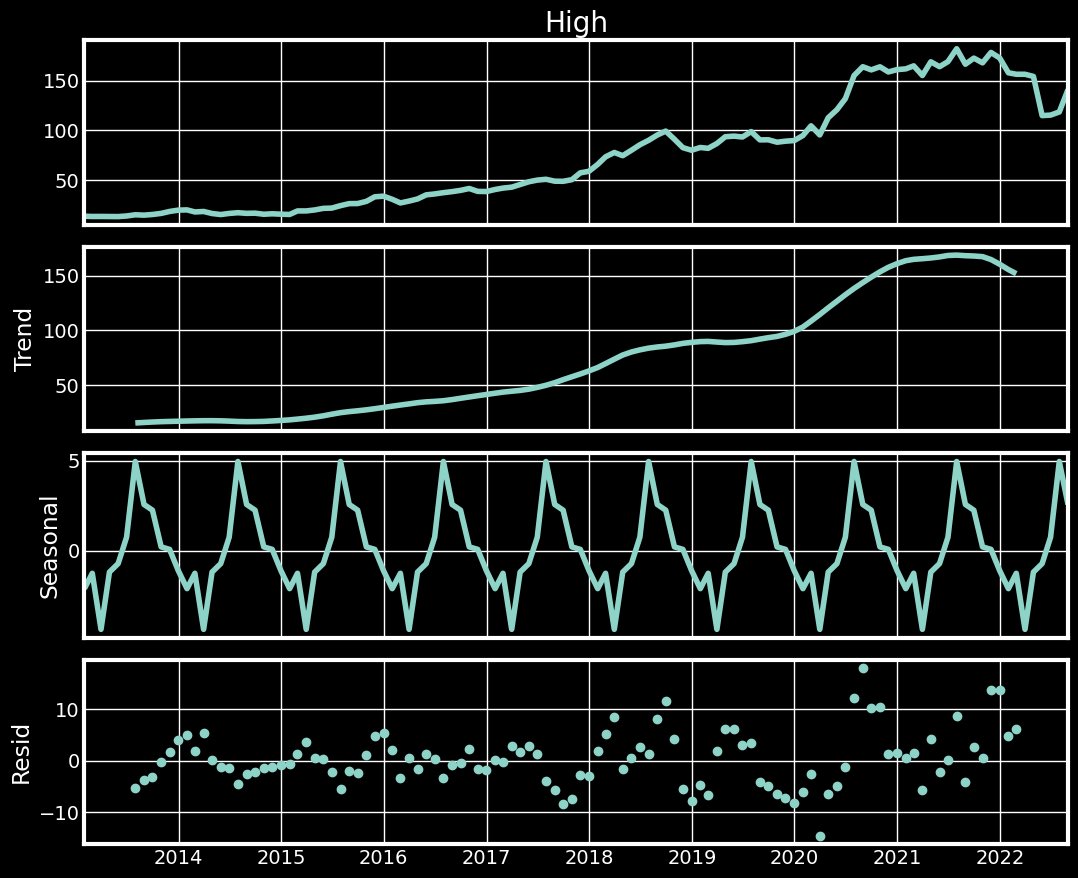

In [170]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['High'], model='Additive')
fig = decomposition.plot()
plt.show()

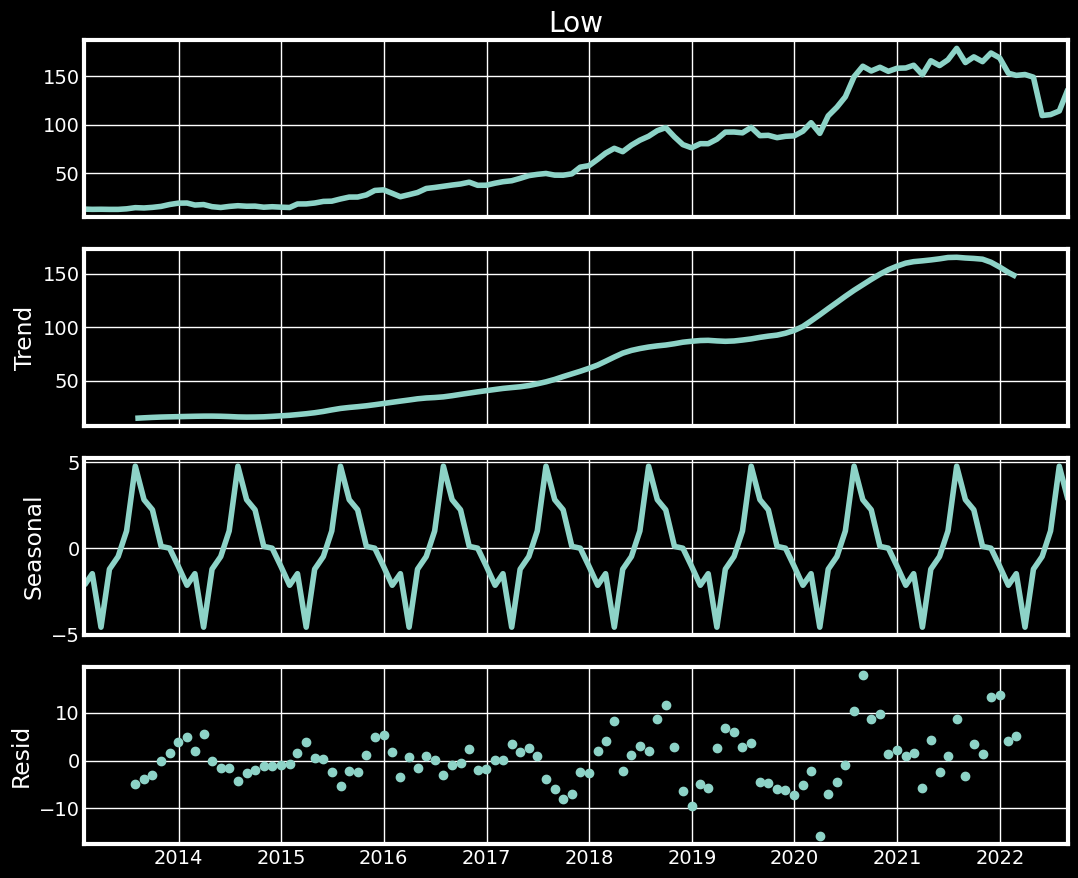

In [171]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Low'], model='Additive')
fig = decomposition.plot()
plt.show()

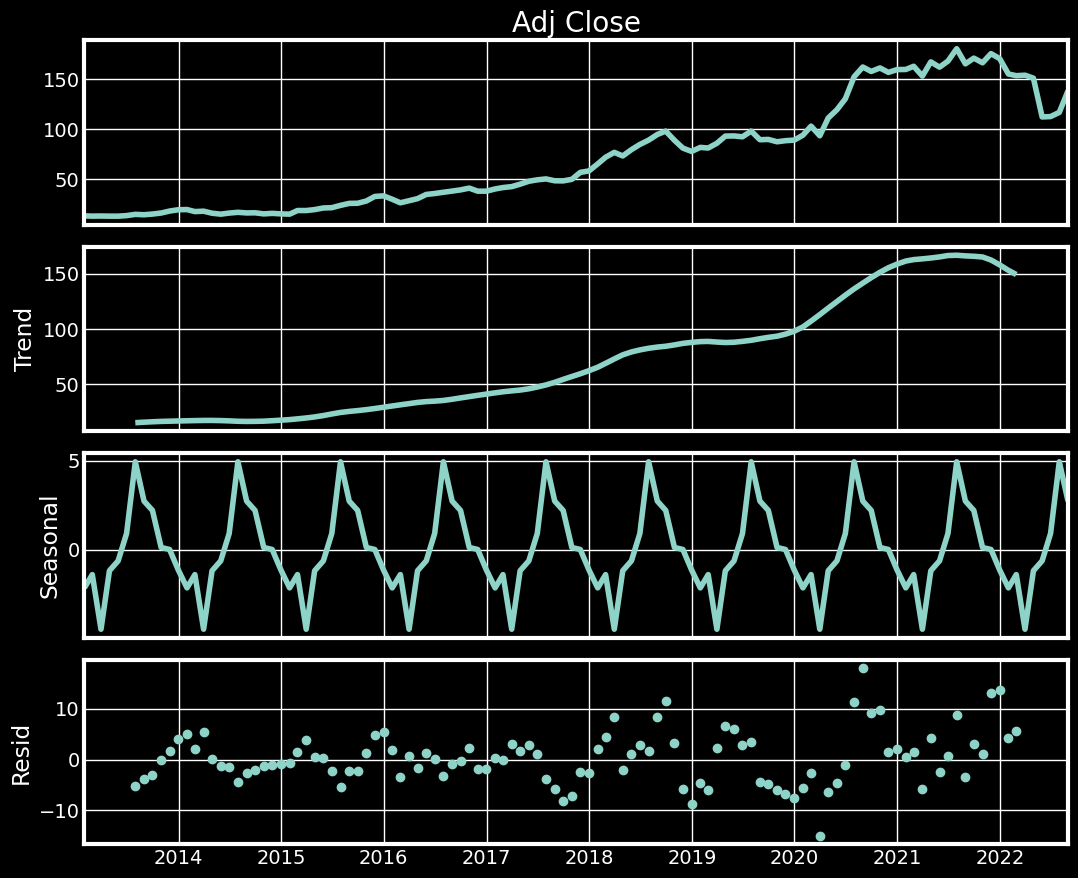

In [172]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Adj Close'], model='Additive')
fig = decomposition.plot()
plt.show()

### **Plotting The Change**

#### **Shift**

The shift function shifts the data before or after the specified amount of time. It will shift the data by one day by default. That means you will get the previous day's data. In financial data like this one, it is helpful to see previous day data and today's data side by side.

In [173]:
df = all_data

<Axes: xlabel='Date'>

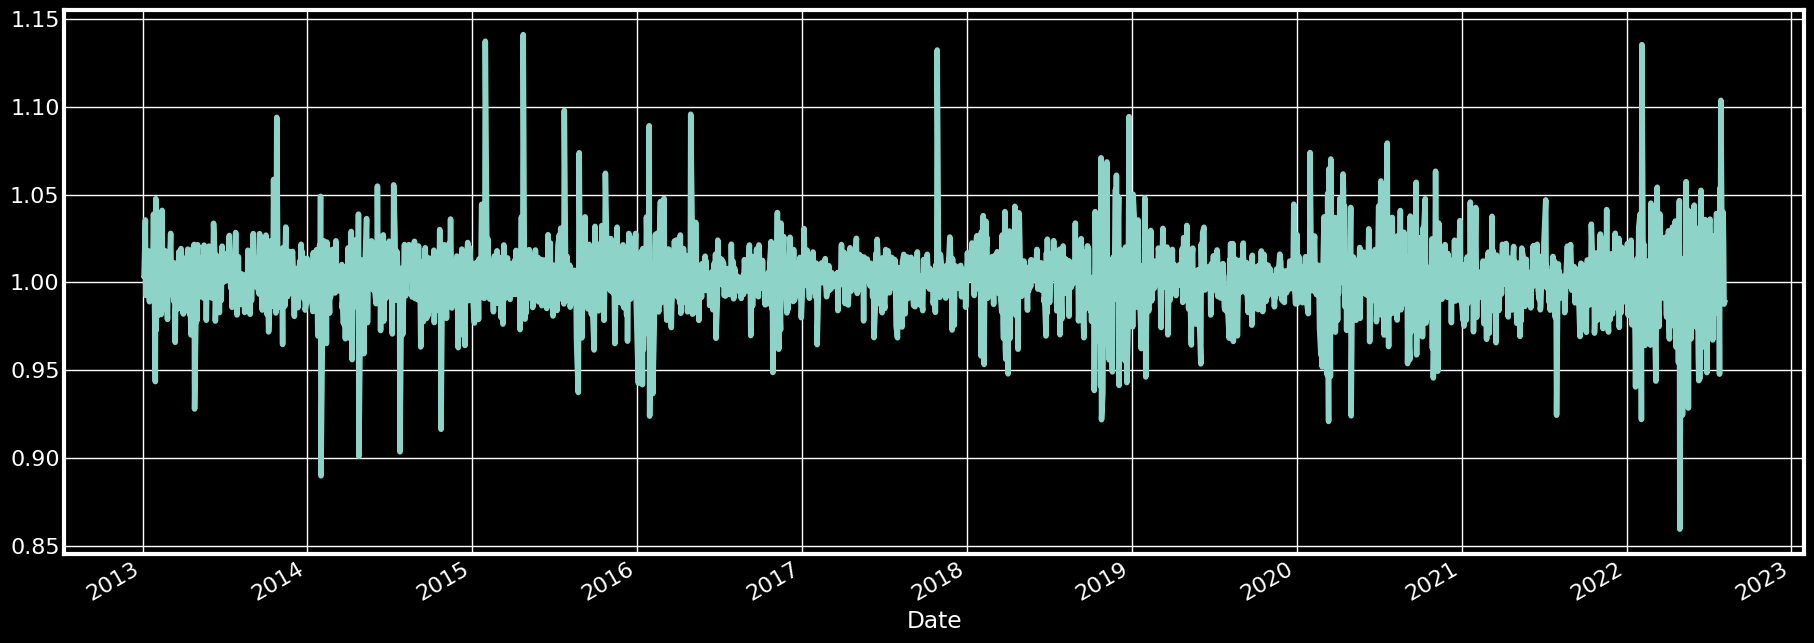

In [174]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(20, 8), fontsize = 16)

In the code above, .div() helps to fill up the missing data. Actually, div() means division. df. div(6) will divide each element in df by 6. But here I used ‘df.Close.shift()’. So, Each element of df will be divided by each element of ‘df.Close.shift()’. We do this to avoid the null values that are created by the ‘shift()’ operation.

### **Heat Map**

In [175]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

# **Preprocessing**

In [176]:
print("There are "+ str(all_data[:'2020'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2021':].shape[0]) + " observations in the test data")

There are 2015 observations in the training data
There are 402 observations in the test data


In [177]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input:
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(2009, 5)

In [178]:
# Make the 3-D shape to a data frame so we can see:
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

0       1       2       3       4       0       1
0      12.87   12.92   12.96   13.42   13.32   13.32   13.27
1      12.92   12.96   13.42   13.32   13.32   13.27   13.40
2      12.96   13.42   13.32   13.32   13.27   13.40   13.64
3      13.42   13.32   13.32   13.27   13.40   13.64   13.60
4      13.32   13.32   13.27   13.40   13.64   13.60   13.45
...      ...     ...     ...     ...     ...     ...     ...
2004  162.05  161.80  160.08  160.31  160.33  159.26  158.63
2005  161.80  160.08  160.31  160.33  159.26  158.63  164.20
2006  160.08  160.31  160.33  159.26  158.63  164.20  166.10
2007  160.31  160.33  159.26  158.63  164.20  166.10  164.29
2008  160.33  159.26  158.63  164.20  166.10  164.29  162.85

[2009 rows x 7 columns]

In [179]:
# Make the 3-D shape to a data frame so we can see:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

0       1       2       3       4
0    158.63  164.20  166.10  164.29  162.85
1    164.20  166.10  164.29  162.85  159.33
2    166.10  164.29  162.85  159.33  160.93
3    164.29  162.85  159.33  160.93  156.92
4    162.85  159.33  160.93  156.92  158.11
..      ...     ...     ...     ...     ...
395  122.42  121.14  114.81  120.97  122.28
396  121.14  114.81  120.97  122.28  134.95
397  114.81  120.97  122.28  134.95  135.39
398  120.97  122.28  134.95  135.39  134.16
399  122.28  134.95  135.39  134.16  139.52

[400 rows x 5 columns]

In [180]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 2009 samples in the training data
There are 400 samples in the test data


# **Model Building**

## **Simple RNN**

In [181]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN

    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[50.238163, 49.657497],
       [50.238163, 49.657497],
       [50.238163, 49.657497],
       [50.23817 , 49.6575  ],
       [50.238163, 49.657497],
       [50.238167, 49.65749 ],
       [50.238167, 49.657497],
       [50.238163, 49.657497],
       [50.238163, 49.657497]], dtype=float32)

(11587.988, <Axes: xlabel='Date'>)

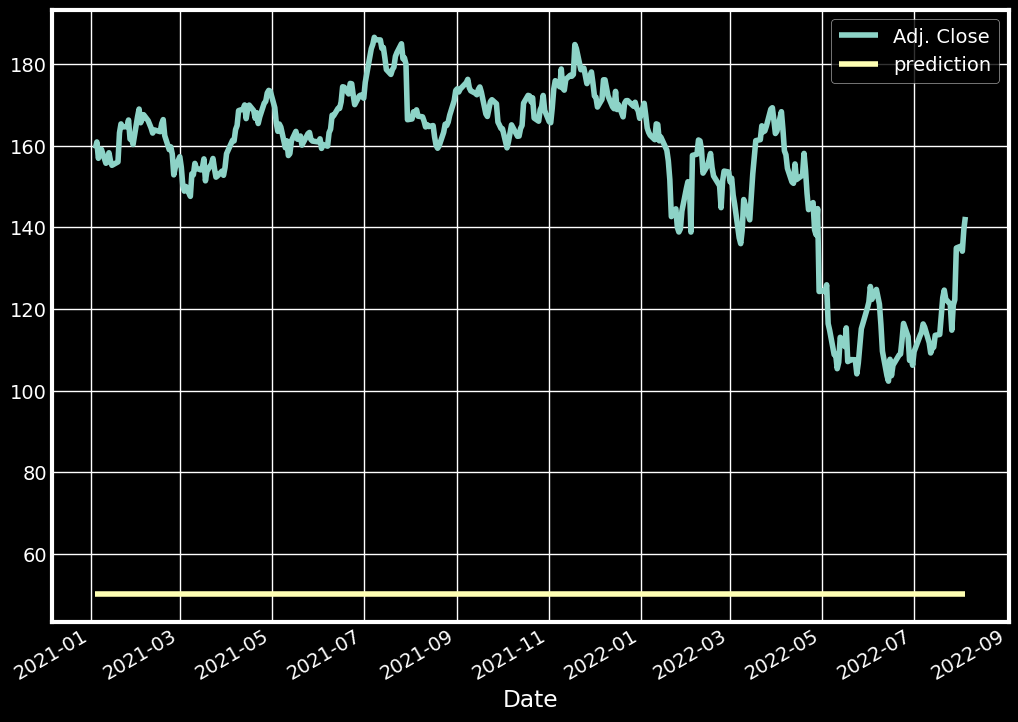

In [182]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))

    return (m.result().numpy(), actual_pred.plot() )

actual_pred_plot(rnn_predictions)

In [183]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input:
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN

    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2[1:10]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[159.4108 , 157.91827],
       [161.11684, 159.53517],
       [157.69128, 156.44286],
       [158.53651, 156.9308 ],
       [158.06516, 157.13008],
       [156.29065, 155.12514],
       [155.57411, 154.1335 ],
       [157.24594, 156.26794],
       [156.29333, 155.38174]], dtype=float32)

## **Simple LSTM**

In [184]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD

    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    # use learning_rate instead of lr
    my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=100,batch_size=150, verbose=1)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

## **Simple GRU**

In [185]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD

    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    # use learning_rate instead of lr
    my_GRU_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=100,batch_size=150, verbose=1)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0759
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0420
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.3233e-04
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9616e-04
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1.7955e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8586e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.7981e-04
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.7427e-04
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.0355e-04
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.7427e-04
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━

array([[161.32002, 161.66493],
       [160.4561 , 160.82361],
       [158.86737, 159.2109 ],
       [157.76355, 158.11479],
       [157.26512, 157.63028],
       [156.60832, 156.94917],
       [155.80429, 156.13582],
       [155.92966, 156.29155],
       [155.71014, 156.06201]], dtype=float32)

(16.311558, <Axes: xlabel='Date'>)

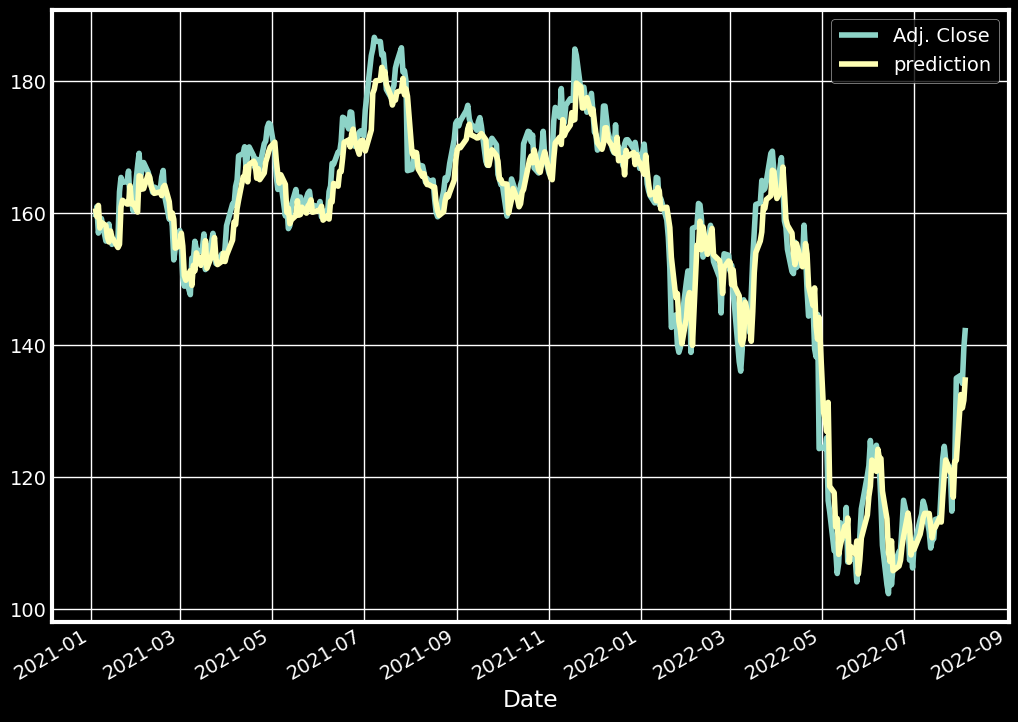

In [186]:
actual_pred_plot(rnn_predictions_2)

In [187]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD

    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    # use learning_rate instead of lr
    my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=100,batch_size=150, verbose=1)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

# Call the function to create the variable in the global scope
my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1156
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0642
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0539
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0512
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0433
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0375
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0343
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0265
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0175
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0085
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020
E

(41.042896, <Axes: xlabel='Date'>)

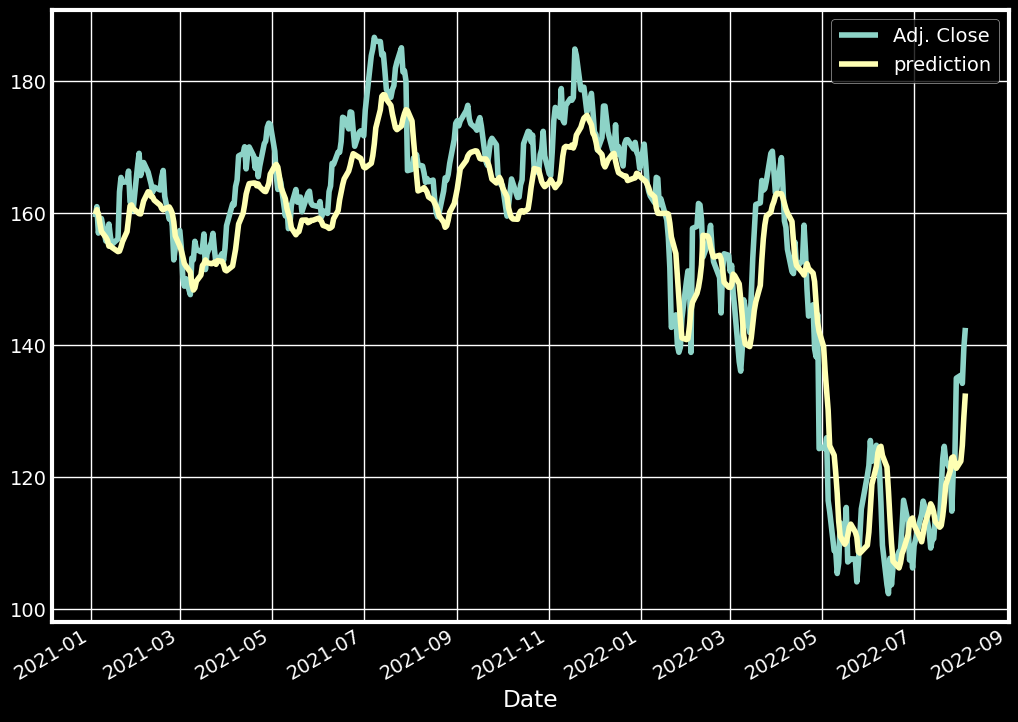

In [188]:
actual_pred_plot(LSTM_prediction)

(26.441162, <Axes: xlabel='Date'>)

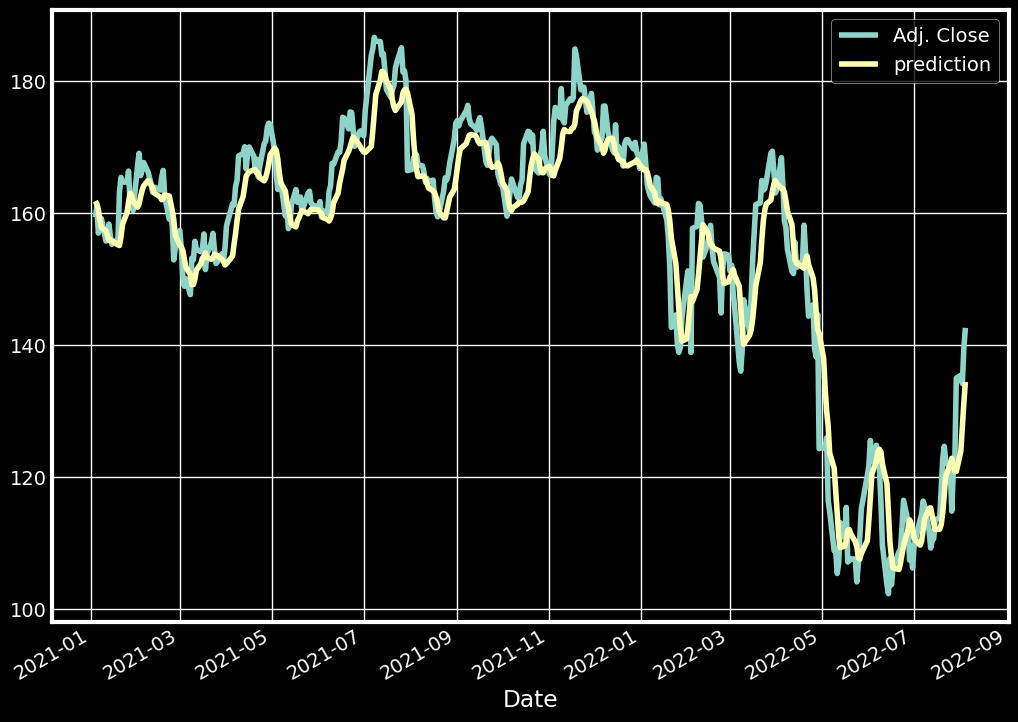

In [189]:
actual_pred_plot(GRU_prediction)

(27.931871, <Axes: xlabel='Date'>)

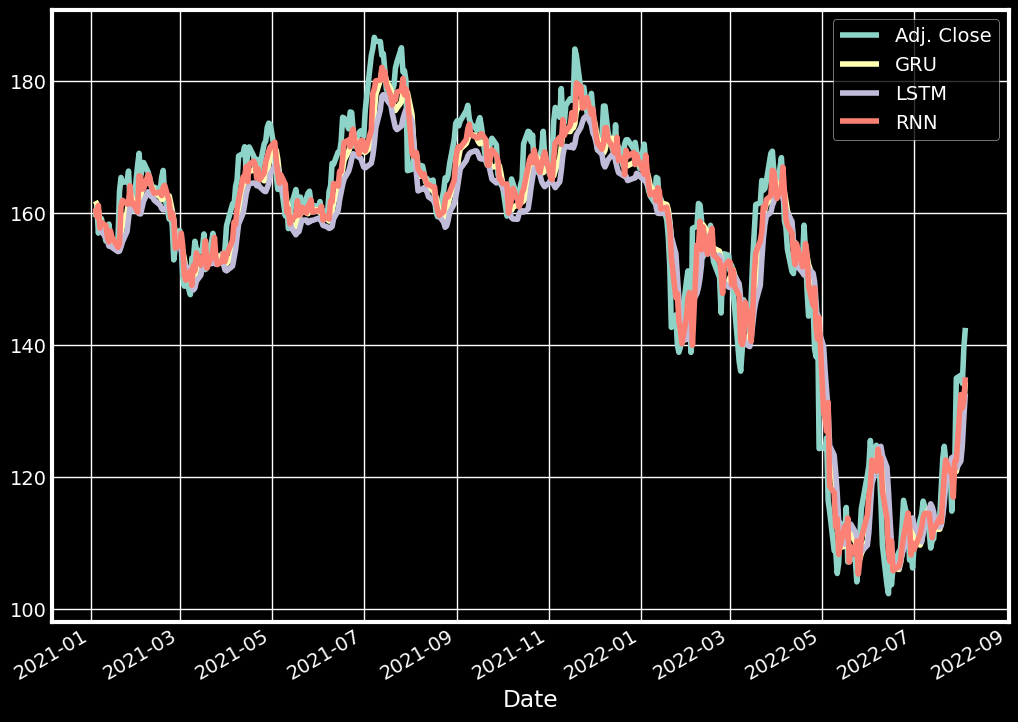

In [190]:
def actual_pred_plot1(preds,preds1,preds2):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'GRU', 'LSTM', 'RNN'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['GRU'] = preds2[:,0]
    actual_pred['LSTM'] = preds1[:,0]
    actual_pred['RNN'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['RNN']))
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['LSTM']))
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['GRU']))

    return (m.result().numpy(), actual_pred.plot() )

actual_pred_plot1(rnn_predictions_2,LSTM_prediction,GRU_prediction)